In [2]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.stats.diagnostic as diag
import scipy.stats as sc
import forecast
from matplotlib import pyplot
import statsmodels.formula.api as smf

#Optional, wider screen display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [68]:
def basic_timeseries_graph(data, header, x_label,y_label):
    
    #fig, ax = plt.subplots()
    ax = data.plot(figsize = (15,5))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(header)
    sns.despine()
    plt.show()
    
    
def harmonic_regression(df, target, m, K ):
    df2 = pd.DataFrame()
    df2[target]=df[target]
    df2['Trend']=df['Trend']

    for i in range(K): df2['Sin'+str(i+1)] = np.sin(2*(i+1)*np.pi*df2['Trend']/m)
    for i in range(K): df2['Cos'+str(i+1)] = np.cos(2*(i+1)*np.pi*df2['Trend']/m)

    formula = "+".join(df2.columns[2:(len(df2.columns))])
    formula=target+ "~Trend+"+formula
    mod2 = smf.ols(formula,data=df2)
    res2 = mod2.fit()
    print(res2.summary())
    return res2, mod2

def plot_orig_and_fit(df, target, fit):
    plt.figure(figsize=(20,5), dpi=100)
    plt.plot(df[target], label='Data')
    #plt.plot(res1.fittedvalues, label='Fitted Values (Seasonal)')
    plt.plot(fit.fittedvalues, label='Fitted Values')
    plt.title('Fitted vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

## Q1

In [76]:
#Read data
q1_temp = pd.read_csv('gasoline.csv')
#Rename column header and index
q1_temp.rename(columns = {'Unnamed: 0' : 'Trend', 'x' : 'Gasoline' }, inplace = True)
q1_temp.index = pd.date_range(start='02/feb/1991', end='20/jan/2017', freq = 'W' )
train = q1_temp[:'2004-12-26']
test = q1_temp['2005-01-02':]

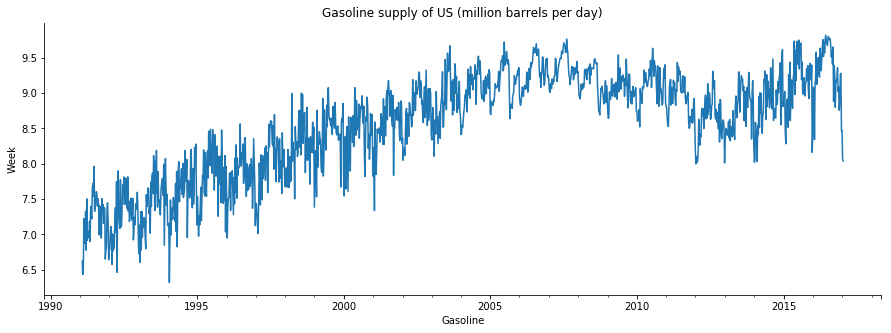

In [77]:
basic_timeseries_graph(q1_temp['Gasoline'], 'Gasoline supply of US (million barrels per day)', 'Gasoline', 'Week')

#### A) Fit a harmonic regression with trend to the data. Experiment with changing the number Fourier terms. Plot the observed gasoline and fitted values and comment on what you see.

All harmonic fits with K values between 1 and 10 are below.

K = 1 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1133.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.62e-272
Time:                        22:47:30   Log-Likelihood:                -120.61
No. Observations:                 726   AIC:                             249.2
Df Residuals:                     722   BIC:                             267.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0923      0.021    332.782 

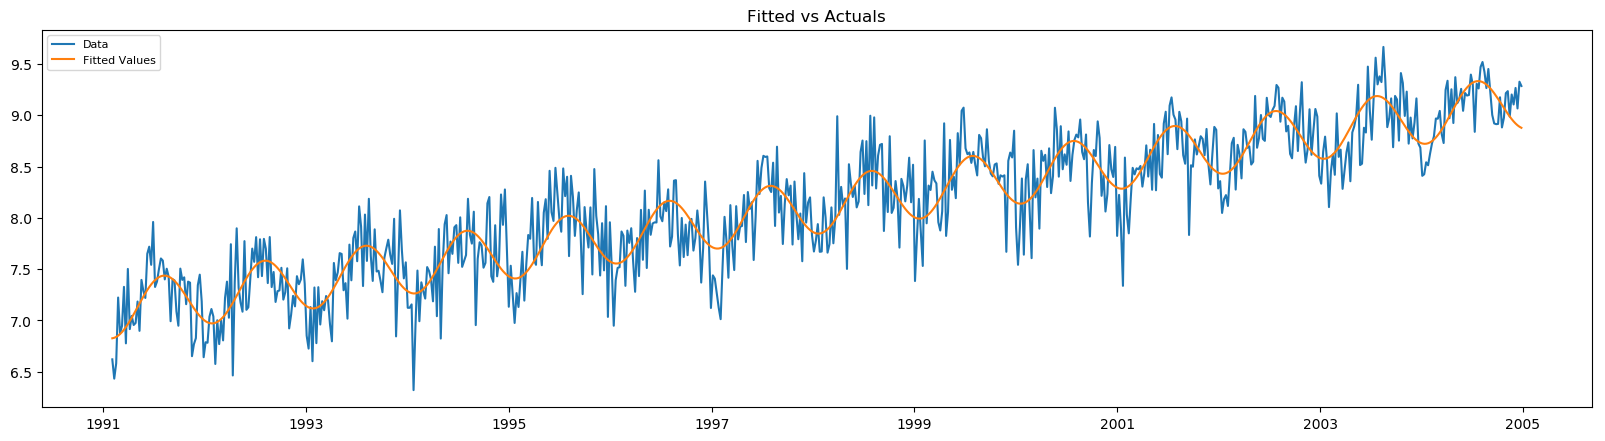

K = 2 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     688.8
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.62e-271
Time:                        22:47:30   Log-Likelihood:                -115.83
No. Observations:                 726   AIC:                             243.7
Df Residuals:                     720   BIC:                             271.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0938      0.021    334.493 

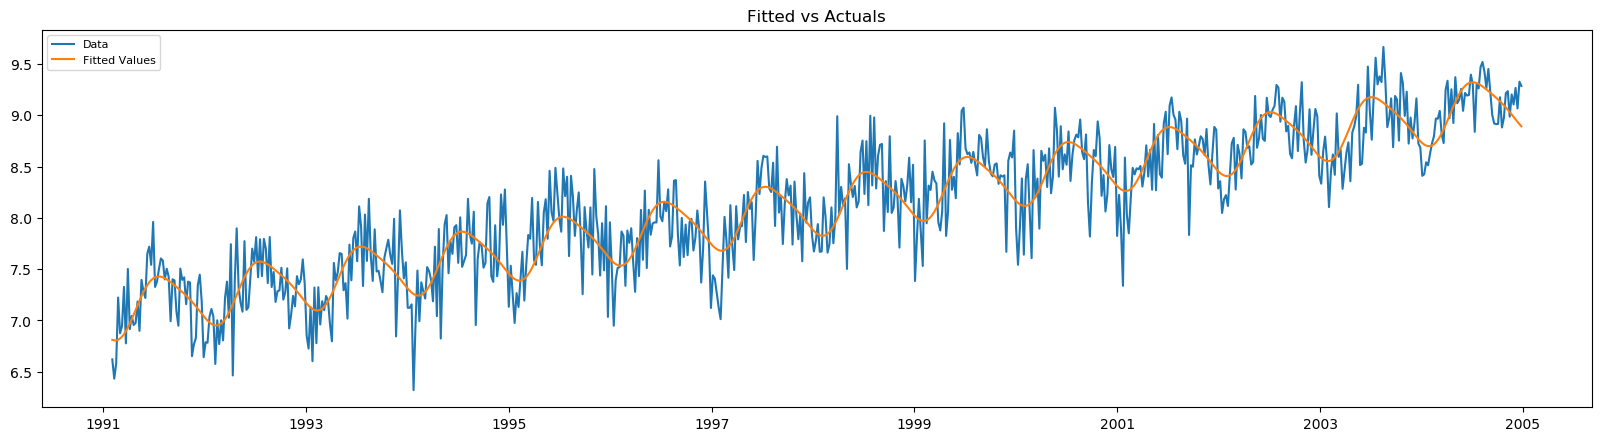

K = 3 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     526.2
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          9.61e-278
Time:                        22:47:30   Log-Likelihood:                -94.701
No. Observations:                 726   AIC:                             205.4
Df Residuals:                     718   BIC:                             242.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0944      0.021    343.883 

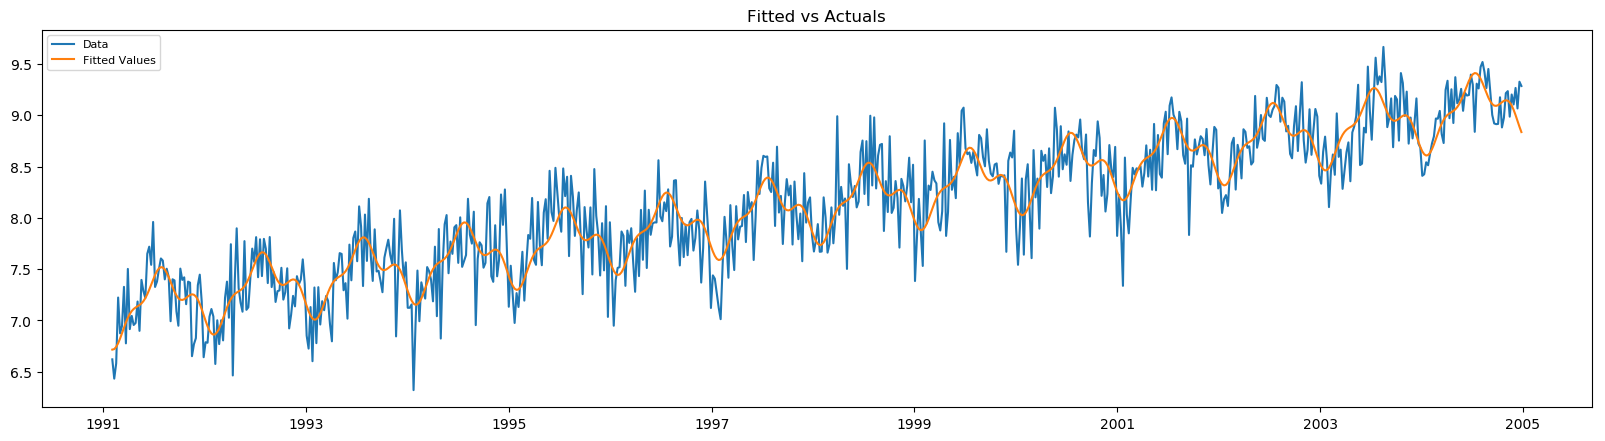

K = 4 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     413.4
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.10e-276
Time:                        22:47:31   Log-Likelihood:                -90.813
No. Observations:                 726   AIC:                             201.6
Df Residuals:                     716   BIC:                             247.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0945      0.021    345.231 

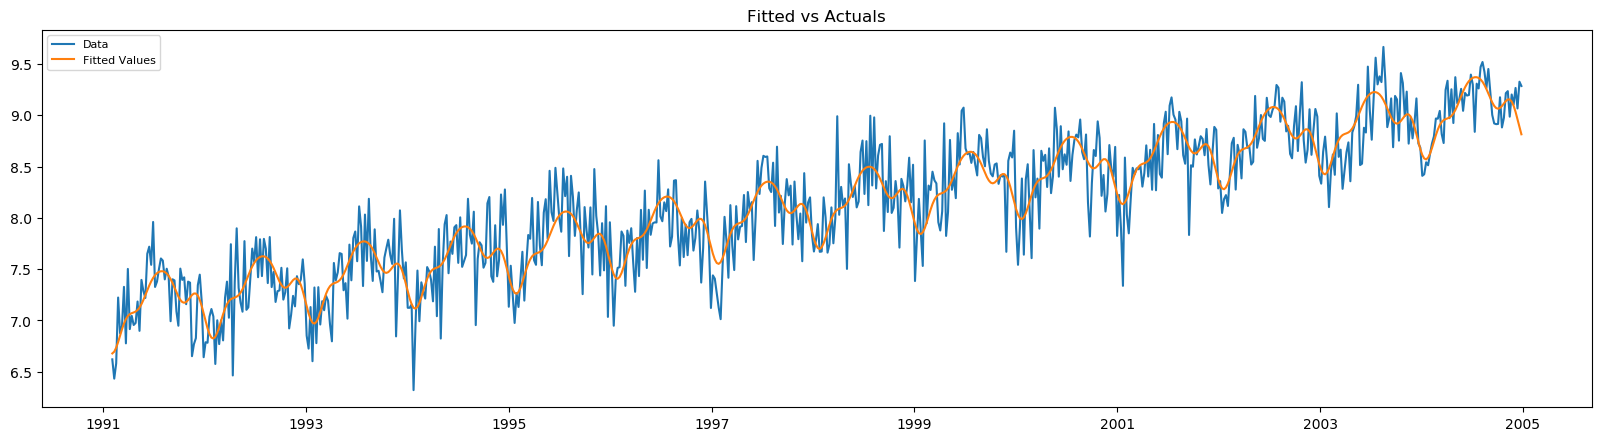

K = 5 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     343.0
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.98e-276
Time:                        22:47:31   Log-Likelihood:                -85.687
No. Observations:                 726   AIC:                             195.4
Df Residuals:                     714   BIC:                             250.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0949      0.020    347.198 

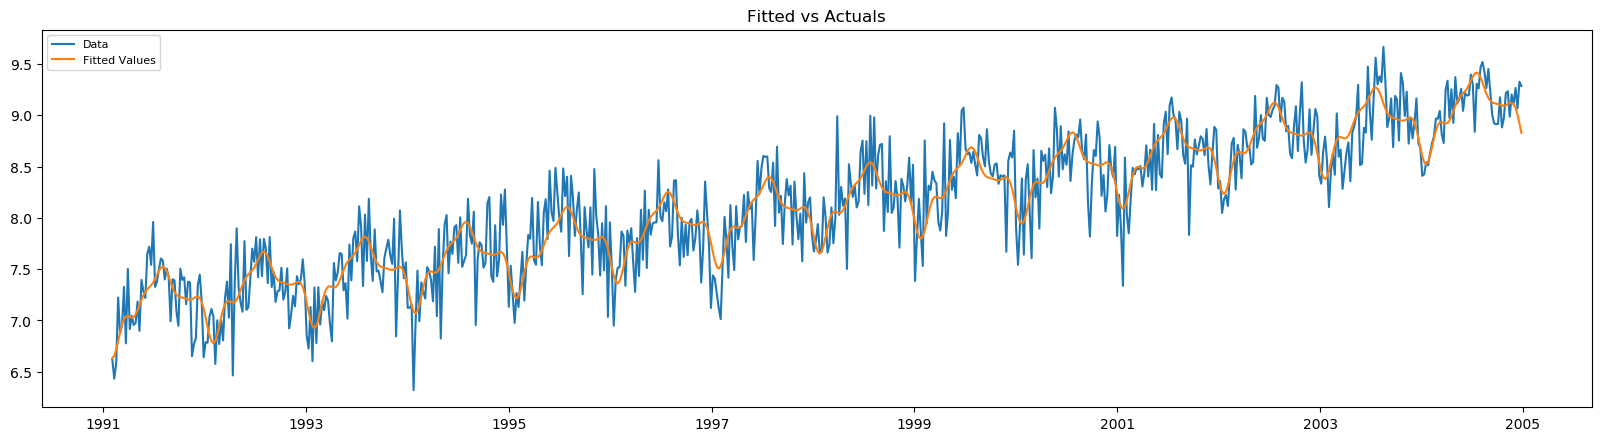

K = 6 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     301.6
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          4.36e-279
Time:                        22:47:31   Log-Likelihood:                -73.040
No. Observations:                 726   AIC:                             174.1
Df Residuals:                     712   BIC:                             238.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0950      0.020    352.801 

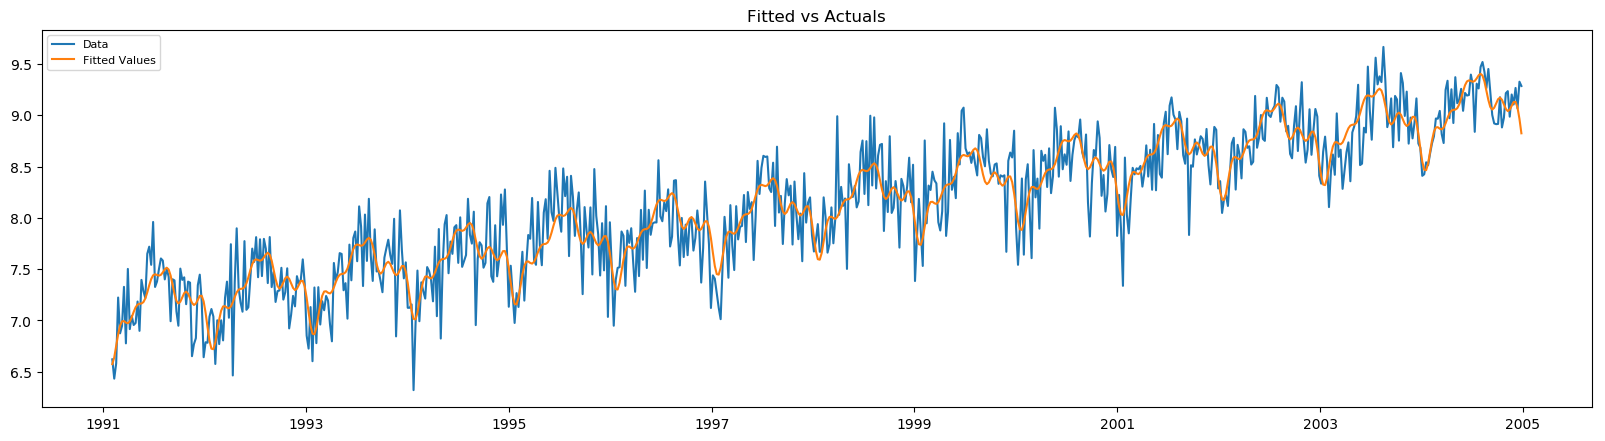

K = 7 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.66e-278
Time:                        22:47:32   Log-Likelihood:                -69.040
No. Observations:                 726   AIC:                             170.1
Df Residuals:                     710   BIC:                             243.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0947      0.020    354.233 

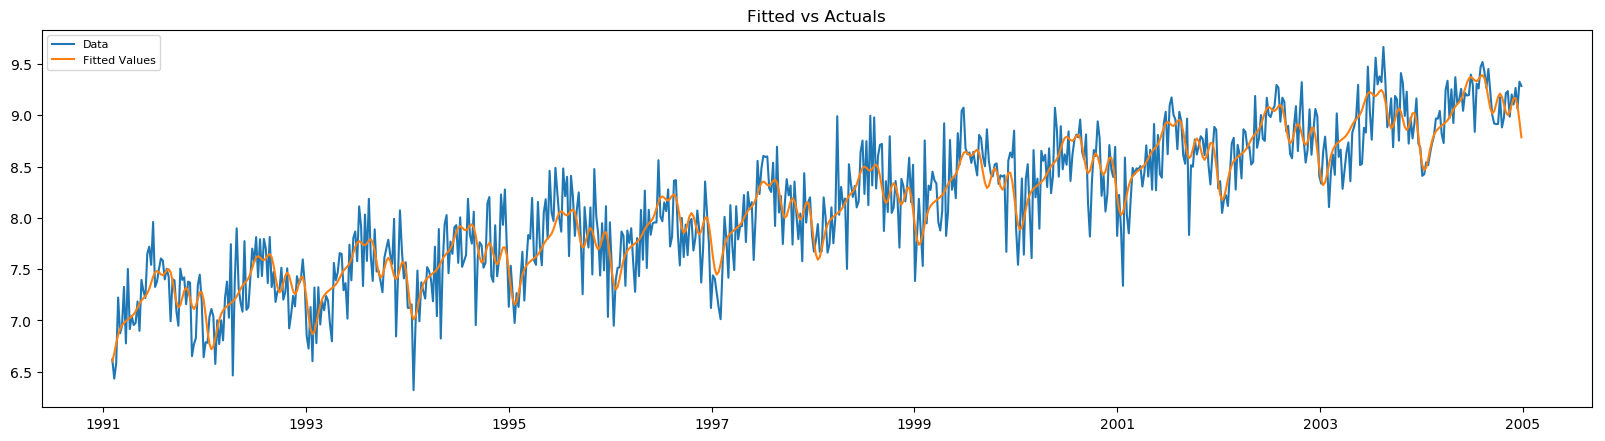

K = 8 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     232.9
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          3.51e-276
Time:                        22:47:32   Log-Likelihood:                -68.325
No. Observations:                 726   AIC:                             172.6
Df Residuals:                     708   BIC:                             255.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0946      0.020    354.075 

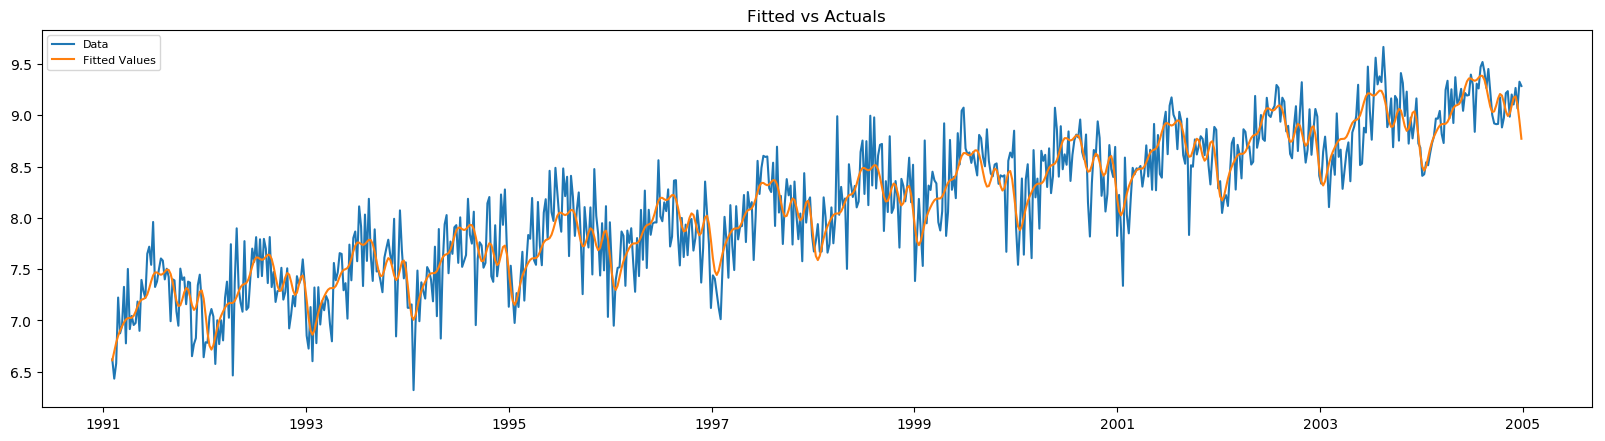

K = 9 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     208.3
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          3.75e-274
Time:                        22:47:33   Log-Likelihood:                -67.520
No. Observations:                 726   AIC:                             175.0
Df Residuals:                     706   BIC:                             266.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0946      0.020    353.962 

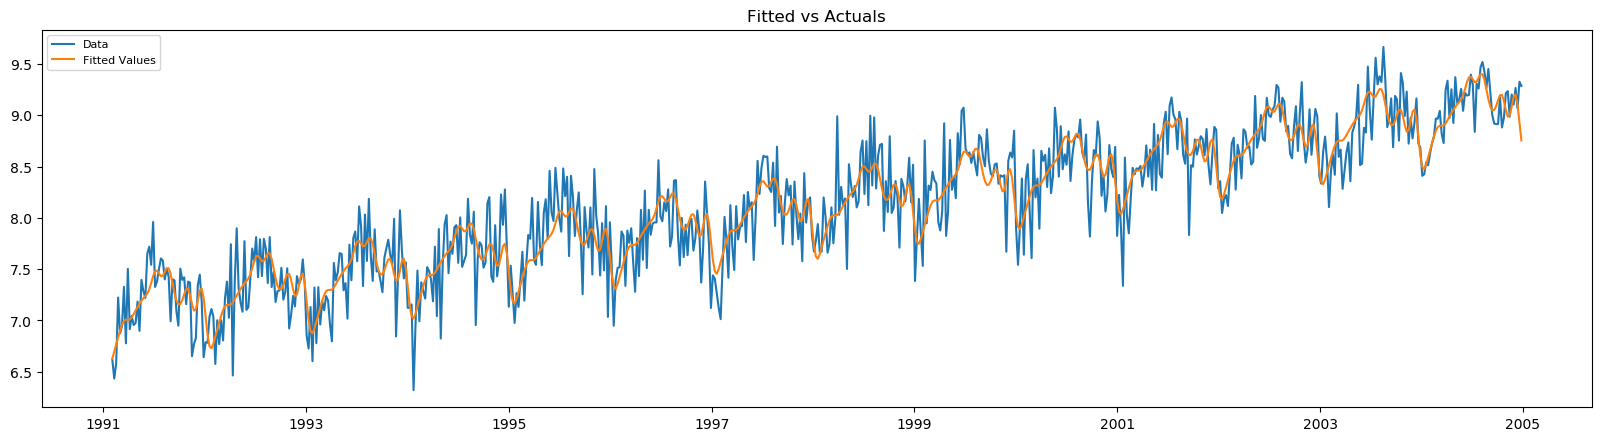

K = 10 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     189.1
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.29e-272
Time:                        22:47:33   Log-Likelihood:                -65.655
No. Observations:                 726   AIC:                             175.3
Df Residuals:                     704   BIC:                             276.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0945      0.020    354.363

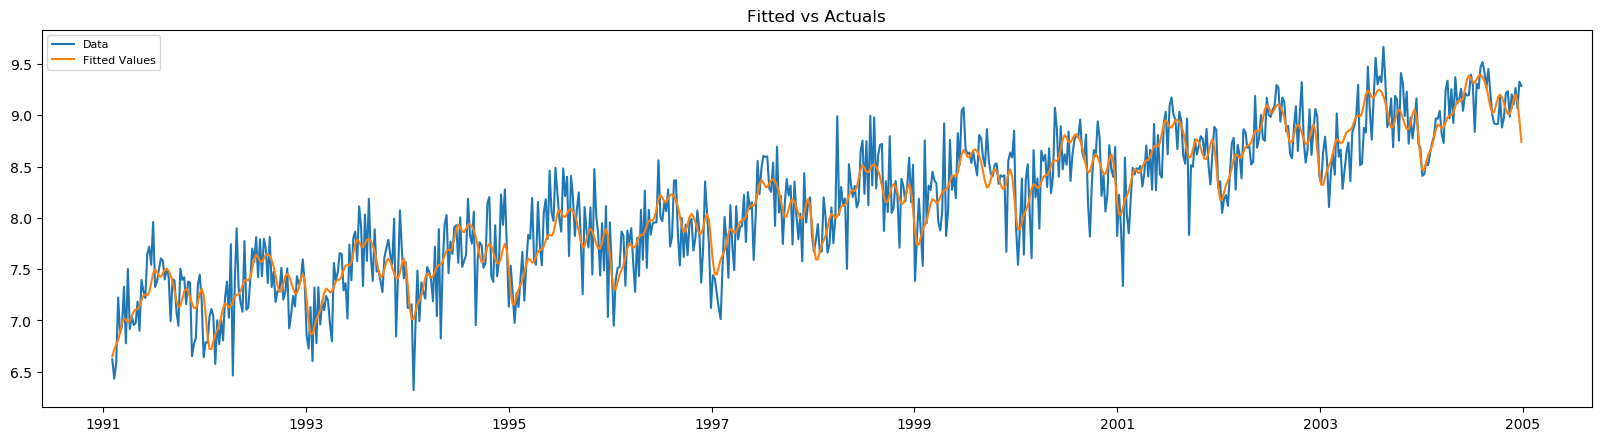

In [78]:
for i in range(1,11):
    print('K = ' +str(i) +' \n')
    res2, model = harmonic_regression(train, 'Gasoline', 52, i )
    plot_orig_and_fit(train, 'Gasoline', res2)

While K values increasing, sensitivity of our models also increase. At first, we observe smoother fits but with the increasing number of harmonic features, We observe more accurate and precise fits.
After K = 7 lowest AIC score has been reached, AIC value started to increase after this point.

#### B) Select the appropriate number of Fourier terms to include by minimizing the AIC value.

As mentioned before, we observed minimum AIC value (170.1) at K = 7.
So, appropriate value for K is 7 according to above fits.

#### C) Check the residuals of the final model.

Final Model

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.66e-278
Time:                        22:47:33   Log-Likelihood:                -69.040
No. Observations:                 726   AIC:                             170.1
Df Residuals:                     710   BIC:                             243.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0947      0.020    354.233      0.0

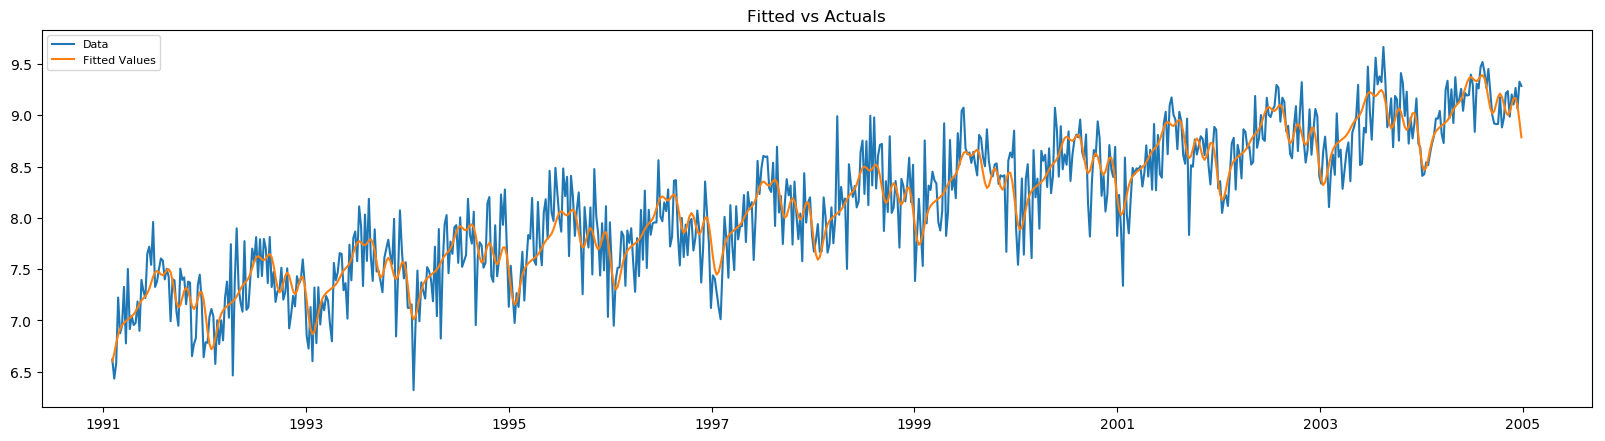

In [79]:
res, model = harmonic_regression(train, 'Gasoline', 52, 7 )
plot_orig_and_fit(train, 'Gasoline', res)

Residuals

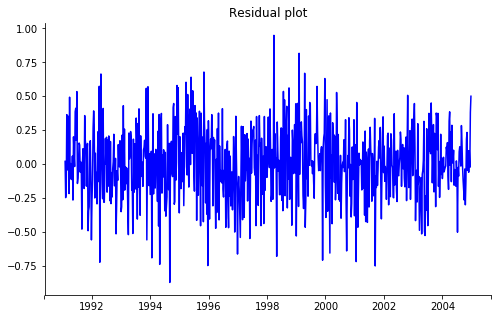

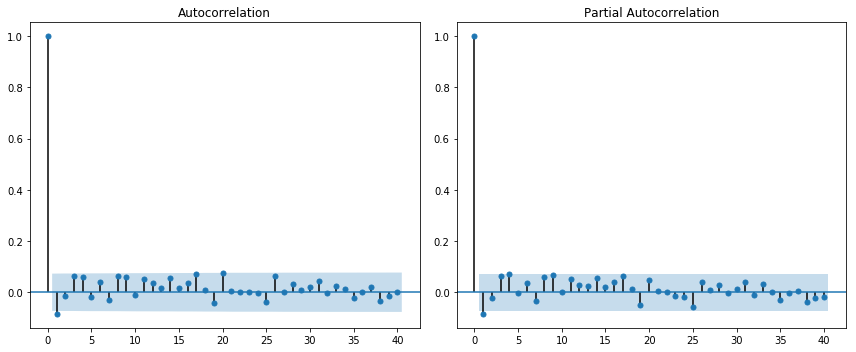

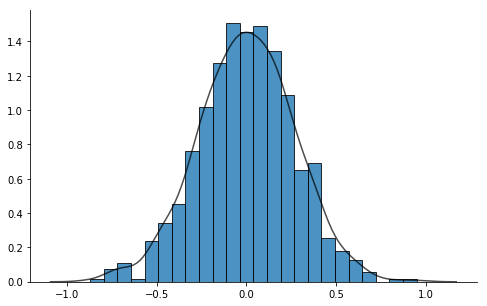

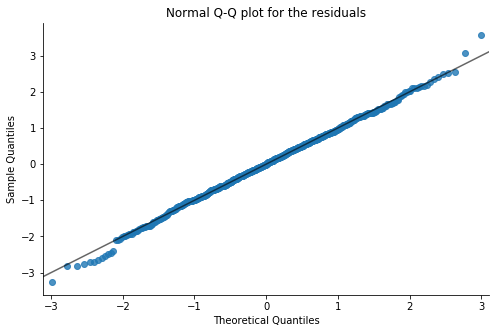

In [80]:
resid = train['Gasoline'] - res.fittedvalues

fig, ax= plt.subplots(figsize=(8,5))
resid.plot(color='blue')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

from forecast import histogram, qq_plot
fig, ax = plt.subplots(1,2, figsize=(12,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax[1])

histogram(resid)
qq_plot(resid)
sns.despine()
fig.tight_layout()
plt.show()

According to residual plots, our residuals are almost WN except lag1 but with considering 1/20 rule, it is acceptable.
Moreover, values look like normally distributed.

#### D) Forecast the next year of data.

In [82]:
Xnew = test['2015']
K = 7
m = 52
for i in range(K): test['Sin'+str(i+1)] = np.sin(2*(i+1)*np.pi*test['Trend']/m)
for i in range(K): test['Cos'+str(i+1)] = np.cos(2*(i+1)*np.pi*test['Trend']/m)
        

Xnew.drop('Gasoline', axis =  1, inplace = True)
Xnew = sm.add_constant(np.array(Xnew))

predictions = model.predict(res.params, Xnew)
predictions

array([10.09266741, 10.17176279, 10.26790066, 10.35150867, 10.40972389,
       10.44527718, 10.46792599, 10.48580415, 10.50208899, 10.51725658,
       10.53297425, 10.55326505, 10.5817694 , 10.61783246, 10.65551268,
       10.687316  , 10.71033814, 10.72990438, 10.75703552, 10.80053651,
       10.85898892, 10.91889827, 10.9615206 , 10.97472914, 10.96200116,
       10.94158884, 10.93508101, 10.9520326 , 10.98097863, 10.99399764,
       10.96353427, 10.88170599, 10.76954897, 10.66896279, 10.62064291,
       10.64054422, 10.70931202, 10.78198102, 10.81312621, 10.78295839,
       10.70874768, 10.63439068, 10.60394301, 10.63462689, 10.70526809,
       10.76703479, 10.77026593, 10.69196383, 10.54855809, 10.38748146,
       10.26328331, 10.21213239])

#### E) Plot the forecasts along with the actual data for 2005. What do you find?

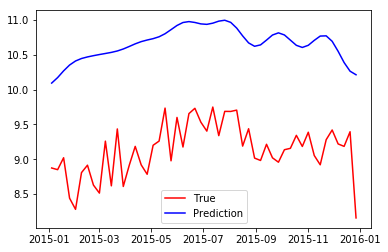

In [83]:
fig, ax = plt.subplots()
ax.plot(test['2015'].index, test['2015']['Gasoline'], 'b-', label="True", color = 'r')
ax.plot(test['2015'].index, predictions, 'b-', label="Prediction")
#ax.plot(test['2015': '2016'].index, predictions, 'b-', label="True")
ax.legend(loc="best")

We over predicted all 2005 values somehow. There must be a trendshift in 2005 or we made a mistake.
But according to above time series graph, slope of trend curve became zero in this year, so our trend predictions became optimistic for this year. 

## Q2

In [84]:
#Read data
q2_temp = pd.read_csv('advert.csv')

#Rename column header and index
q2_temp.rename(columns = {'Unnamed: 0' : 'trend'}, inplace = True)

#### A) Plot the data.

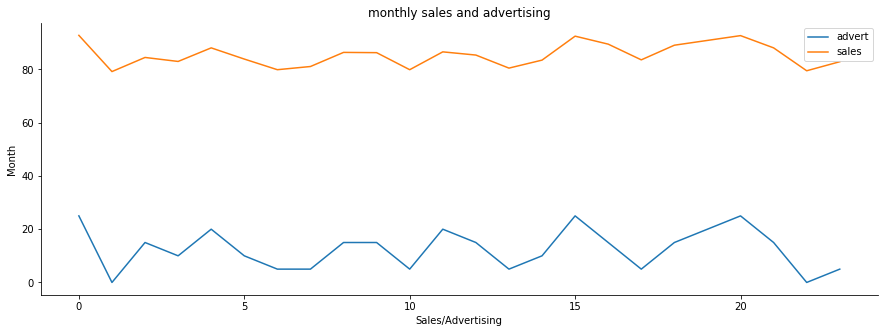

In [85]:
basic_timeseries_graph(q2_temp[['advert', 'sales']], 'monthly sales and advertising', 'Sales/Advertising', 'Month')

#### B) Fit a standard regression model 𝑦𝑡=𝑎+𝑏𝑥𝑡+𝜀𝑡 where 𝑦𝑡 denotes sales and 𝑥𝑡 denotes advertising using ordinary least squares.

In [86]:
formula="sales~advert"
mod = smf.ols(formula,data=q2_temp)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     170.0
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           7.96e-12
Time:                        22:48:19   Log-Likelihood:                -42.831
No. Observations:                  24   AIC:                             89.66
Df Residuals:                      22   BIC:                             92.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.7343      0.597    131.806      0.0

#### C) Show that the residuals have significant autocorrelation

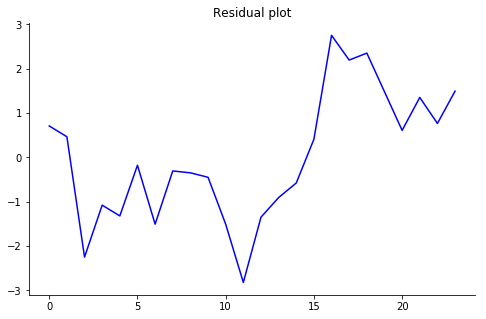

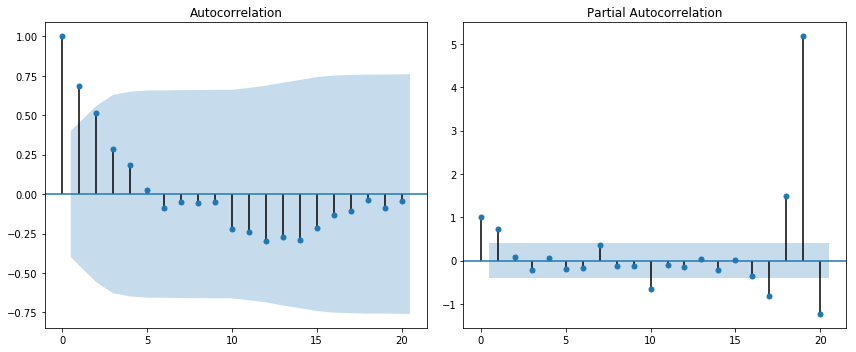

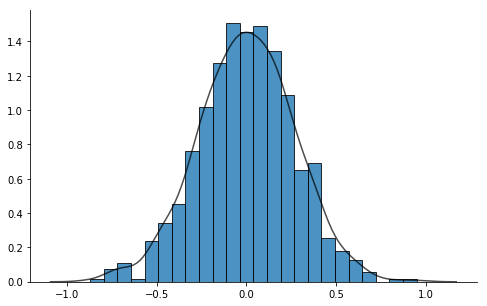

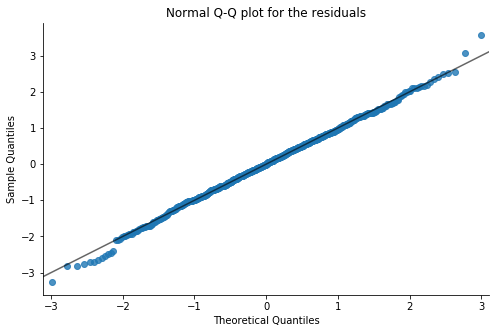

In [87]:
residuals = res.resid
fig, ax= plt.subplots(figsize=(8,5))
residuals.plot(color='blue')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

from forecast import histogram, qq_plot
fig, ax = plt.subplots(1,2, figsize=(12,5))
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=ax[1])

histogram(resid)
qq_plot(resid)
sns.despine()
fig.tight_layout()
plt.show()

According to above graphs, residuals are not WN. Especially Lag1 shows significant autocorrelation

#### D) What difference does it make you use the SARIMAX function instead where residuals are assumed to come from ARIMA (0,0,0)?

In [88]:
arima1 = sm.tsa.SARIMAX(q2_temp['sales'], order=(0, 0, 0), seasonal_order=(0, 2, 0, 4)).fit()
arima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:                   sales   No. Observations:                   24
Model:             SARIMAX(0, 2, 0, 4)   Log Likelihood                 -51.847
Date:                 Thu, 04 Jun 2020   AIC                            105.694
Time:                         22:48:24   BIC                            106.467
Sample:                              0   HQIC                           105.734
                                  - 24                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        38.2054     13.045      2.929      0.003      12.638      63.773
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.63
Prob(Q):                               nan   Prob(JB):                         0.44
Heteroskedasticity (H):               3.65   Skew:                            -0.78
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

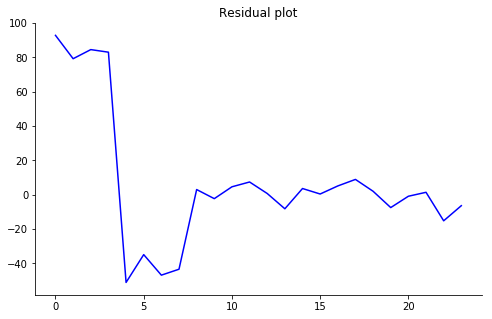

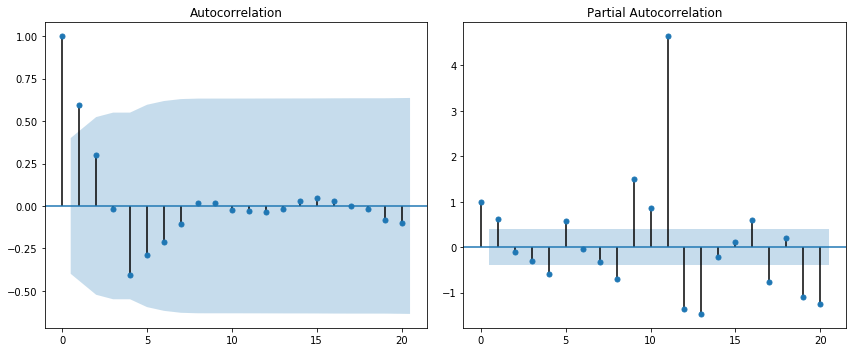

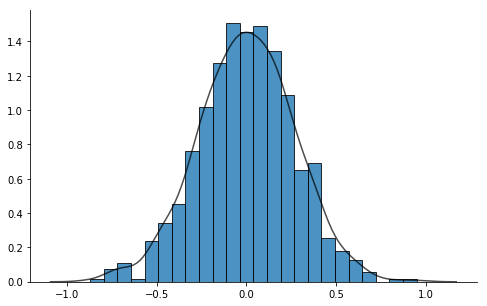

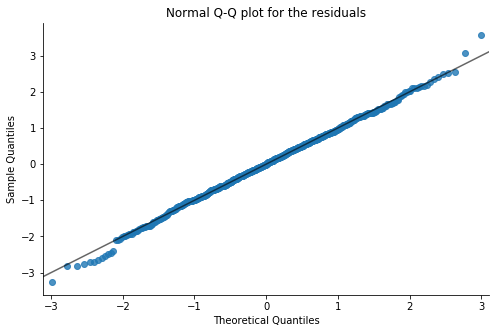

In [89]:
residuals = arima1.resid
fig, ax= plt.subplots(figsize=(8,5))
residuals.plot(color='blue')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

from forecast import histogram, qq_plot
fig, ax = plt.subplots(1,2, figsize=(12,5))
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=ax[1])

histogram(resid)
qq_plot(resid)
sns.despine()
fig.tight_layout()
plt.show()

Our data shows no significant upward trend but graph indicates a strong seasonality.
So, keeping ARIMA(0,0,0) parameters constant and using second order seasonal difference our timeseries analysis performs well.
However, because we are not using advert feature, there are still unexplained residual trend in our model.

#### E) Refit the model using auto_arima(). How much difference does the error model make to the estimated parameters? What ARIMA model for the errors is selected?

In [90]:
ARIMA_auto=auto_arima(q2_temp.iloc[:,2],exogenous=np.array(q2_temp.iloc[:,1]).reshape(-1,1),trend='c',seasonal=True)
ARIMA_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -34.149
Date:                Thu, 04 Jun 2020   AIC                             76.299
Time:                        22:48:28   BIC                             81.011
Sample:                             0   HQIC                            77.549
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.9195     18.347      1.140      0.254     -15.040      56.879
x1             0.5079      0.024     21.518      0.000       0.462       0.554
ar.L1          0.7361      0.232      3.176      0.001       0.282       1.190
sigma2         0.9757      0.328      2.972      0.003       0.332       1.619
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.31
Prob(Q):                               nan   Prob(JB):                         0.86
Heteroskedasticity (H):               0.78   Skew:                            -0.26
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

auto_arima model makes a significant difference in both AIC score and coefficients of our parameters.
Selected model is SARIMAX(1, 0, 0)(0,2,0,4).

#### F) Check the residuals of the fitted model.

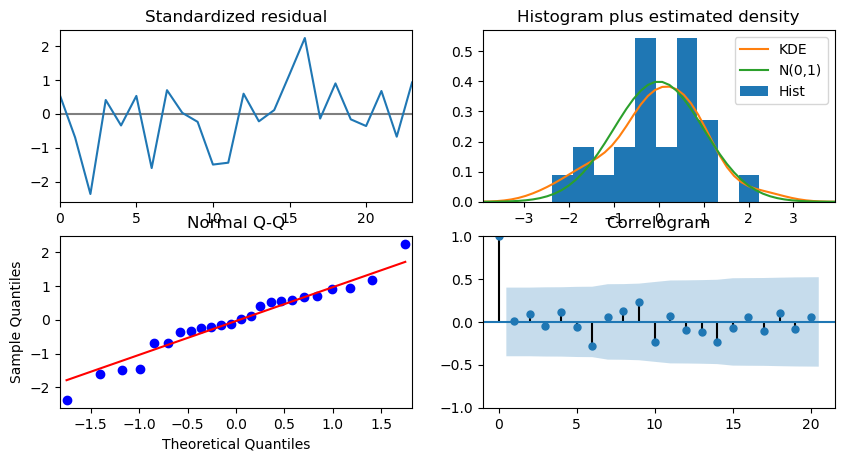

In [91]:
plot = ARIMA_auto.plot_diagnostics(lags=20,fig=plt.figure(figsize=(10,5), dpi=100))

Residuals look like WN. However, distribution doesn't look like normal.

#### G) Assuming the advertising budget for the next six months is exactly 10 units per month, produce and plot point sales forecasts for the next six months.

In [92]:
six_months_forecast = ARIMA_auto.predict(n_periods=6, exogenous = np.array((10,10,10,10,10,10)).reshape(-1,1) )
q3_temp = q2_temp.append(list(six_months_forecast), ignore_index = True)
q3_temp['Prediction'] = q3_temp[0]

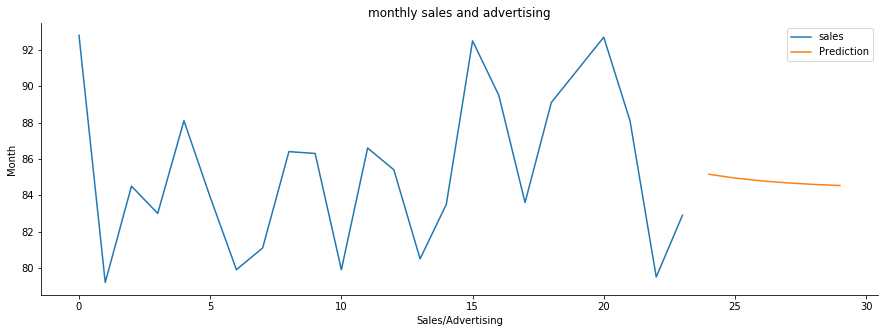

In [93]:
basic_timeseries_graph(q3_temp[['sales', 'Prediction']], 'monthly sales and advertising', 'Sales/Advertising', 'Month')

Most of the prediction power comes from advertising, while advertising budgets are constant, sales follows a relatively flat path.

## Q3

#### A) Using ordinary least squares, fit a harmonic regression with a piecewise linear time trend to the full gasoline series. Select the appropriate number of Fourier terms to include by minimizing the AIC value.

K = 1 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     853.1
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          3.89e-311
Time:                        22:48:39   Log-Likelihood:                -777.70
No. Observations:                1355   AIC:                             1563.
Df Residuals:                    1351   BIC:                             1584.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5786      0.023    323.948 

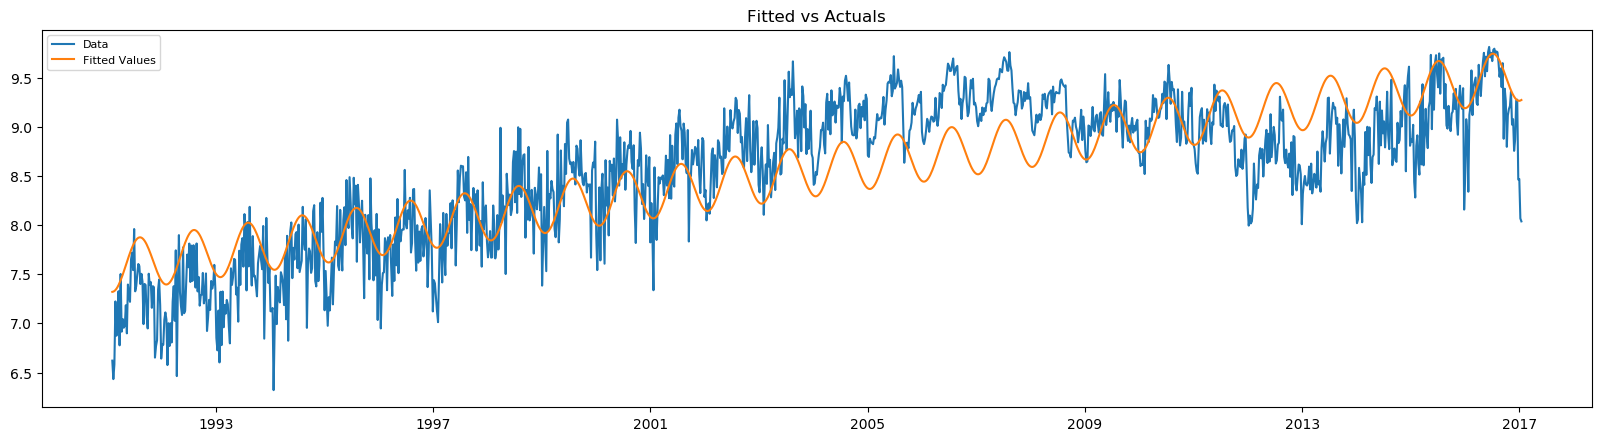

K = 2 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     517.1
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.02e-310
Time:                        22:48:39   Log-Likelihood:                -772.57
No. Observations:                1355   AIC:                             1557.
Df Residuals:                    1349   BIC:                             1588.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    324.951 

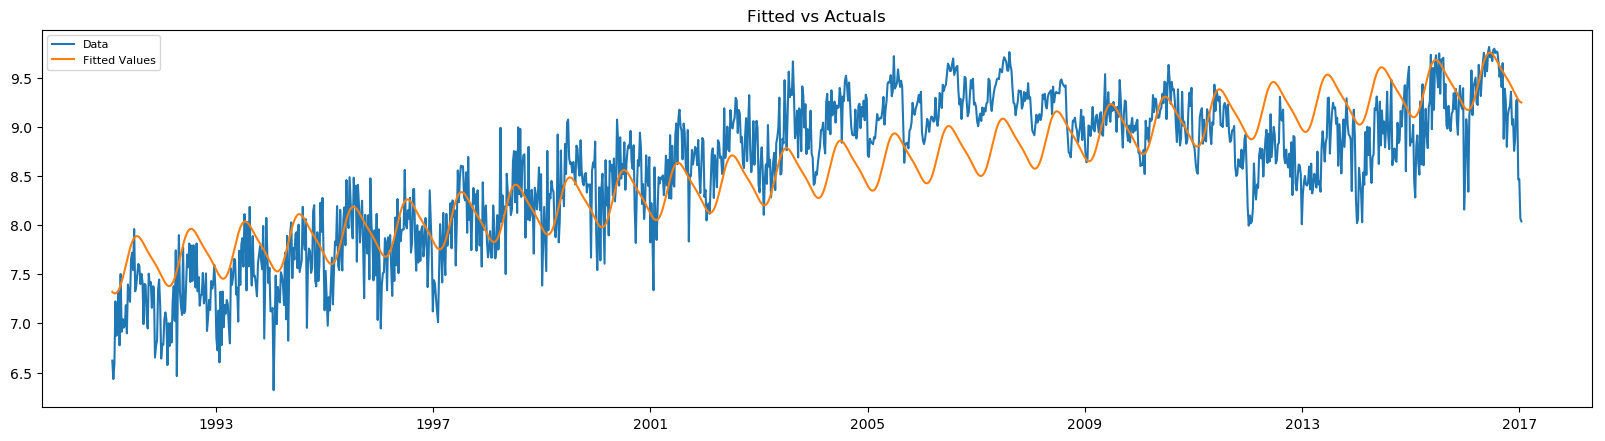

K = 3 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     382.2
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.34e-314
Time:                        22:48:40   Log-Likelihood:                -756.58
No. Observations:                1355   AIC:                             1529.
Df Residuals:                    1347   BIC:                             1571.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5796      0.023    328.561 

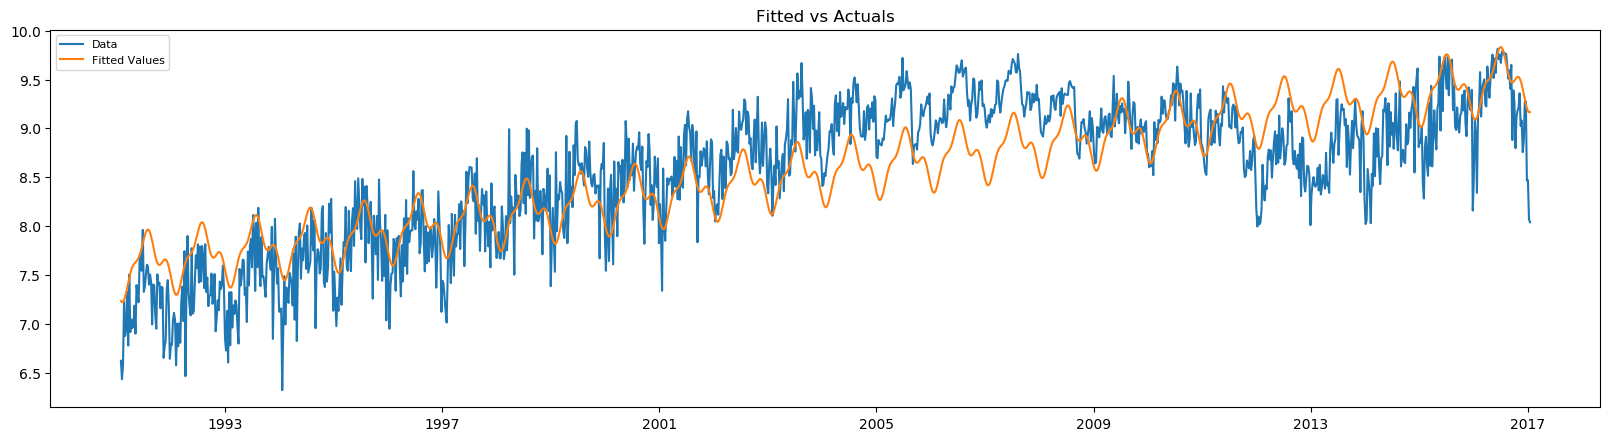

K = 4 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     299.4
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.01e-313
Time:                        22:48:40   Log-Likelihood:                -752.61
No. Observations:                1355   AIC:                             1525.
Df Residuals:                    1345   BIC:                             1577.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    329.272 

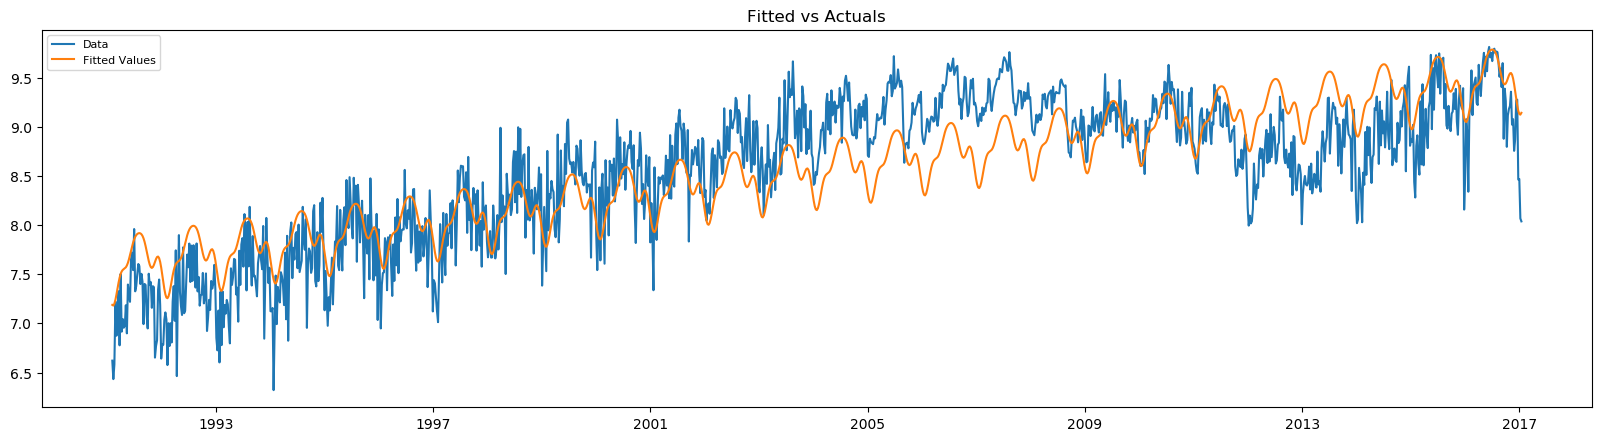

K = 5 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     245.8
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          3.76e-312
Time:                        22:48:40   Log-Likelihood:                -750.50
No. Observations:                1355   AIC:                             1525.
Df Residuals:                    1343   BIC:                             1588.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5796      0.023    329.542 

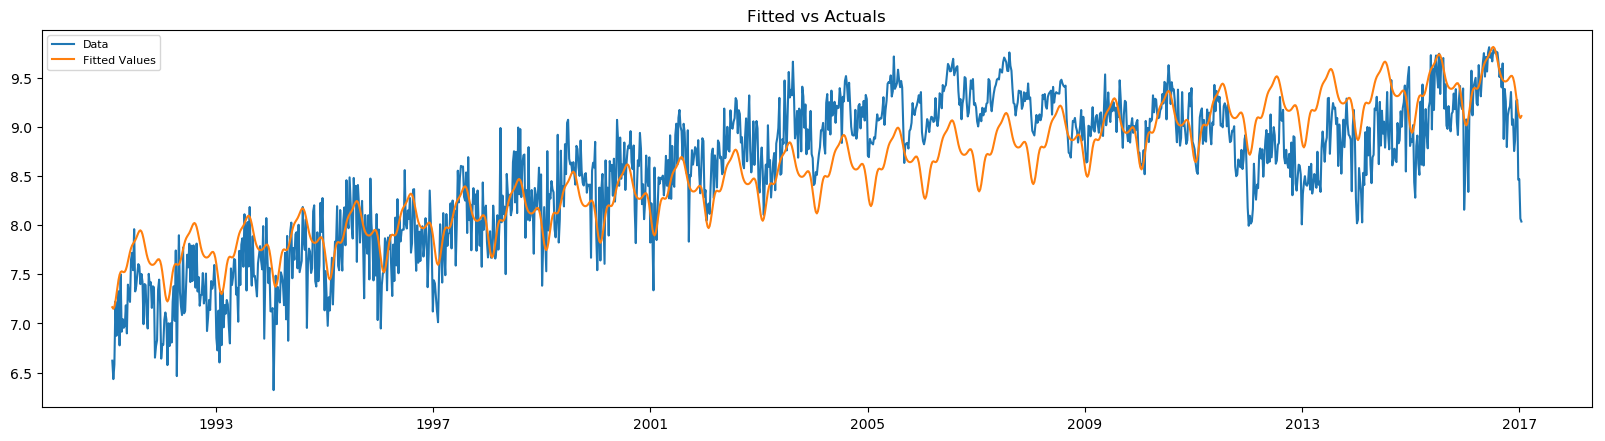

K = 6 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     210.2
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          4.39e-312
Time:                        22:48:41   Log-Likelihood:                -745.07
No. Observations:                1355   AIC:                             1518.
Df Residuals:                    1341   BIC:                             1591.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    330.614 

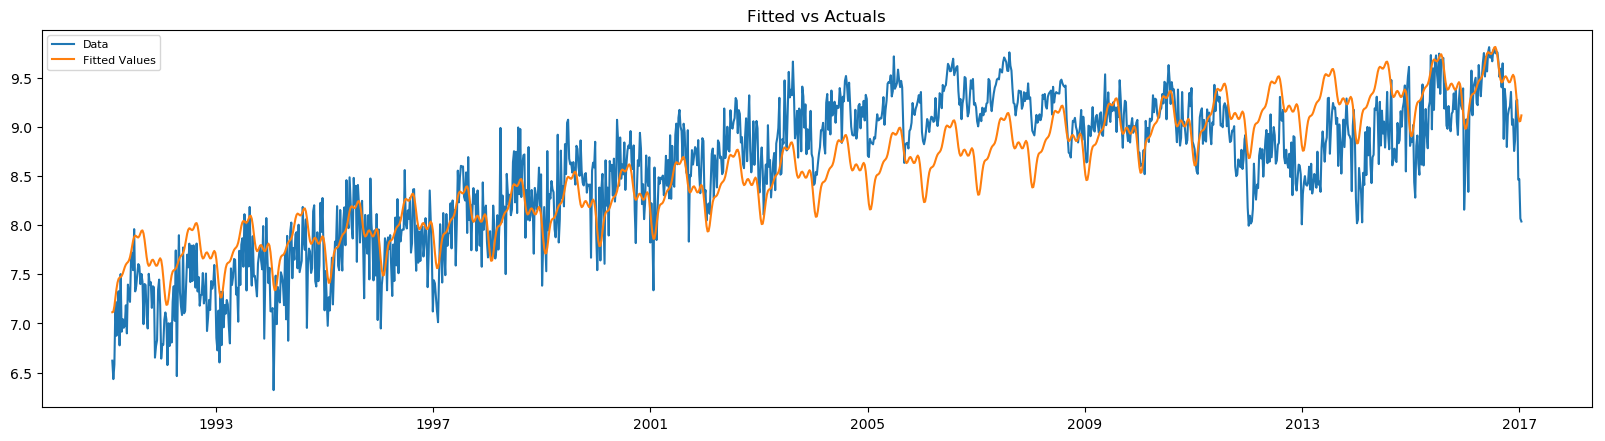

K = 7 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     182.1
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          5.32e-310
Time:                        22:48:41   Log-Likelihood:                -744.51
No. Observations:                1355   AIC:                             1521.
Df Residuals:                    1339   BIC:                             1604.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    330.502 

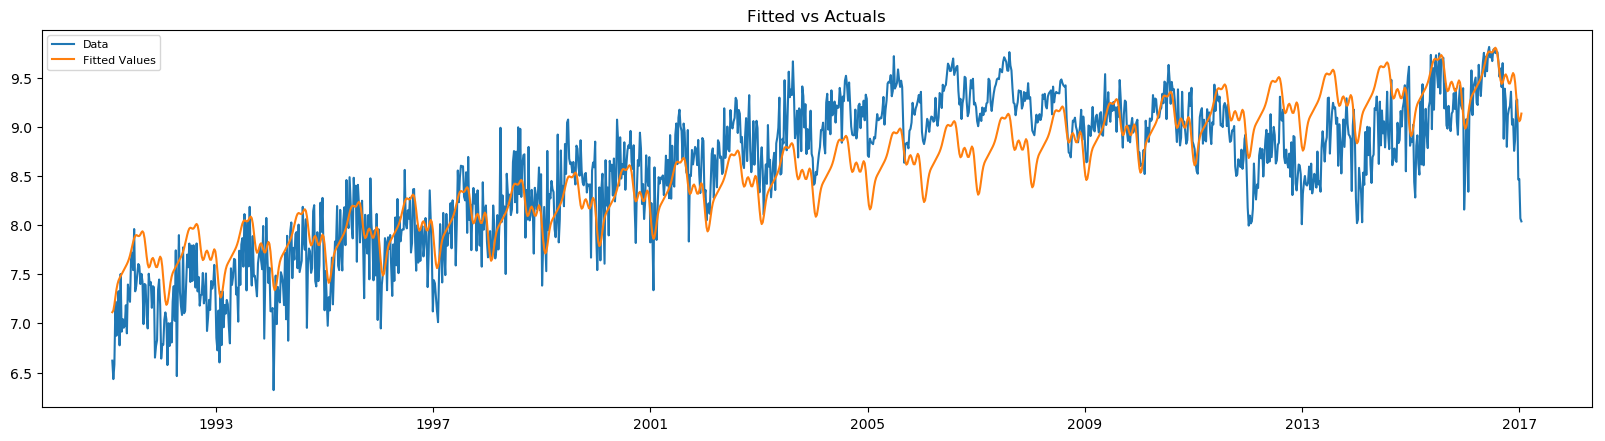

K = 8 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     160.5
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          7.98e-308
Time:                        22:48:42   Log-Likelihood:                -744.31
No. Observations:                1355   AIC:                             1525.
Df Residuals:                    1337   BIC:                             1618.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    330.304 

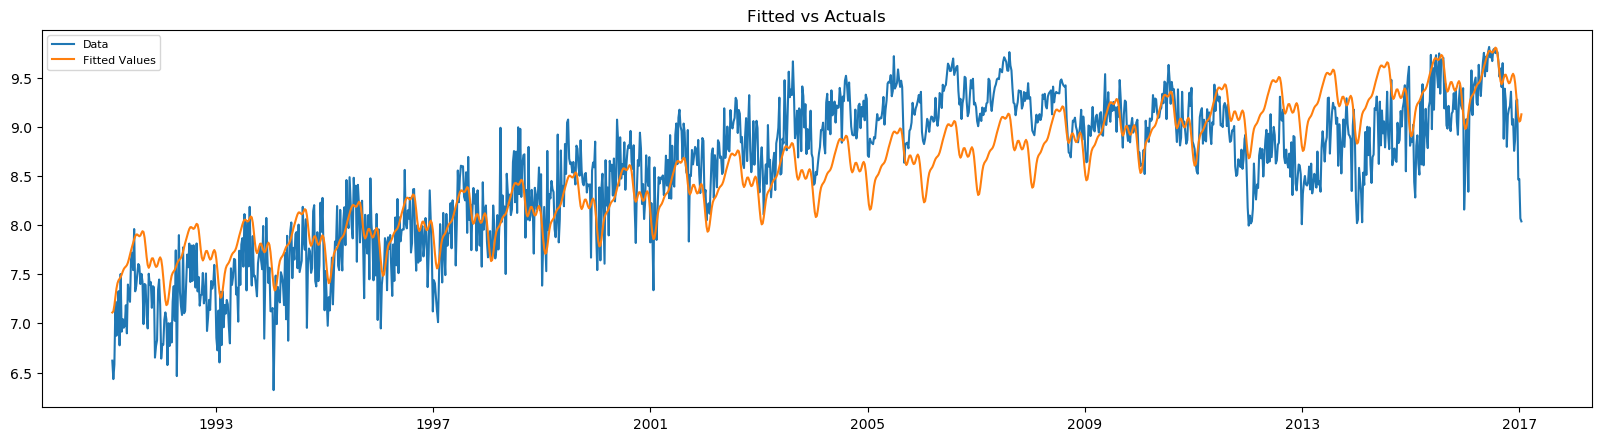

K = 9 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     143.4
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.26e-305
Time:                        22:48:42   Log-Likelihood:                -744.30
No. Observations:                1355   AIC:                             1529.
Df Residuals:                    1335   BIC:                             1633.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    330.061 

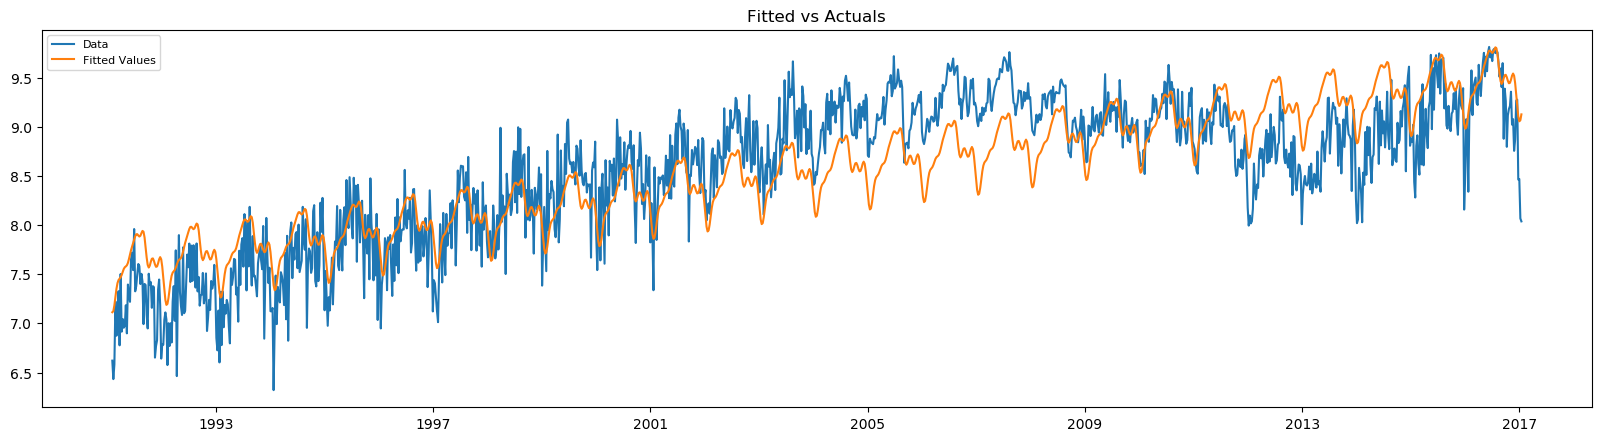

K = 10 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.22e-303
Time:                        22:48:43   Log-Likelihood:                -743.89
No. Observations:                1355   AIC:                             1532.
Df Residuals:                    1333   BIC:                             1646.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    329.911

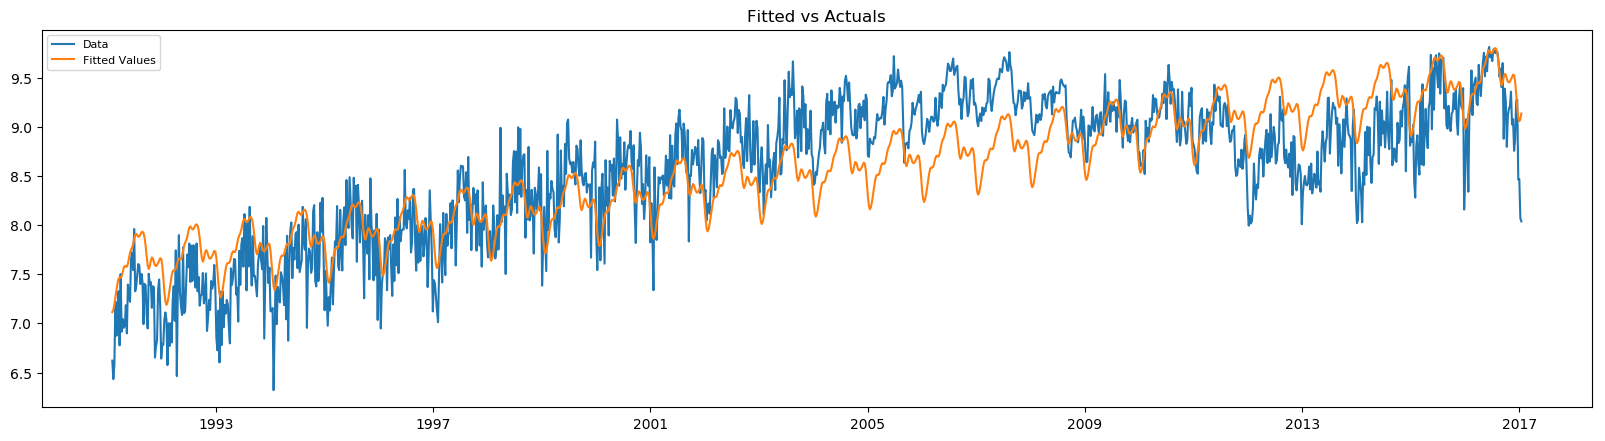

K = 11 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     118.5
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          5.37e-302
Time:                        22:48:43   Log-Likelihood:                -742.78
No. Observations:                1355   AIC:                             1534.
Df Residuals:                    1331   BIC:                             1659.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    329.934

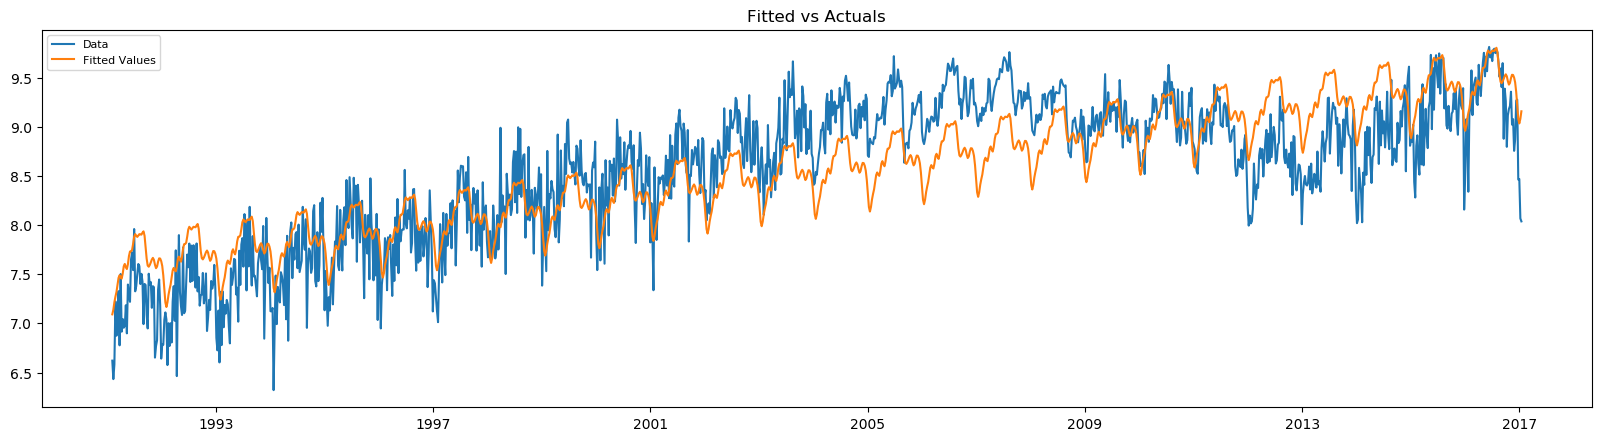

K = 12 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     109.1
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.33e-300
Time:                        22:48:44   Log-Likelihood:                -741.75
No. Observations:                1355   AIC:                             1536.
Df Residuals:                    1329   BIC:                             1671.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5796      0.023    329.939

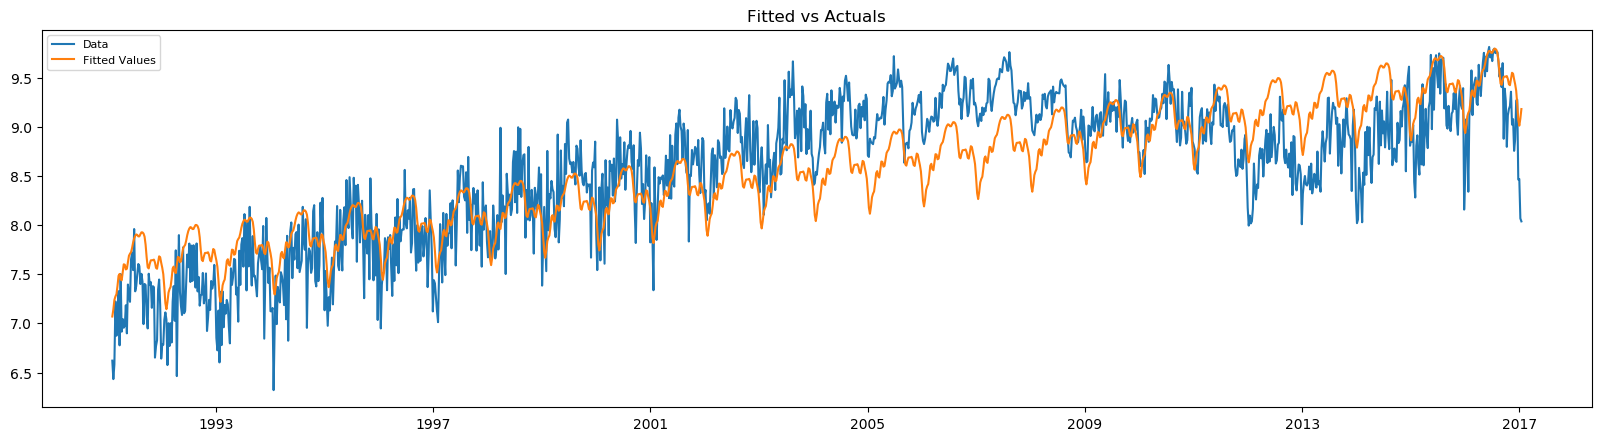

K = 13 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     100.9
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.44e-298
Time:                        22:48:44   Log-Likelihood:                -741.71
No. Observations:                1355   AIC:                             1539.
Df Residuals:                    1327   BIC:                             1685.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    329.700

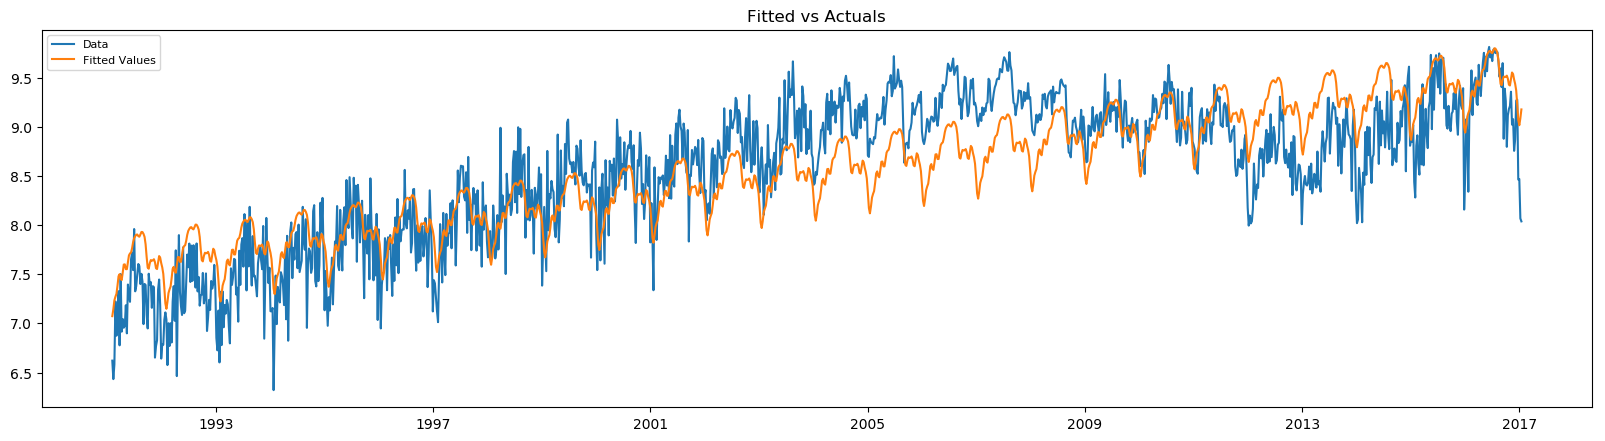

K = 14 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     93.79
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.29e-296
Time:                        22:48:45   Log-Likelihood:                -741.63
No. Observations:                1355   AIC:                             1543.
Df Residuals:                    1325   BIC:                             1700.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    329.470

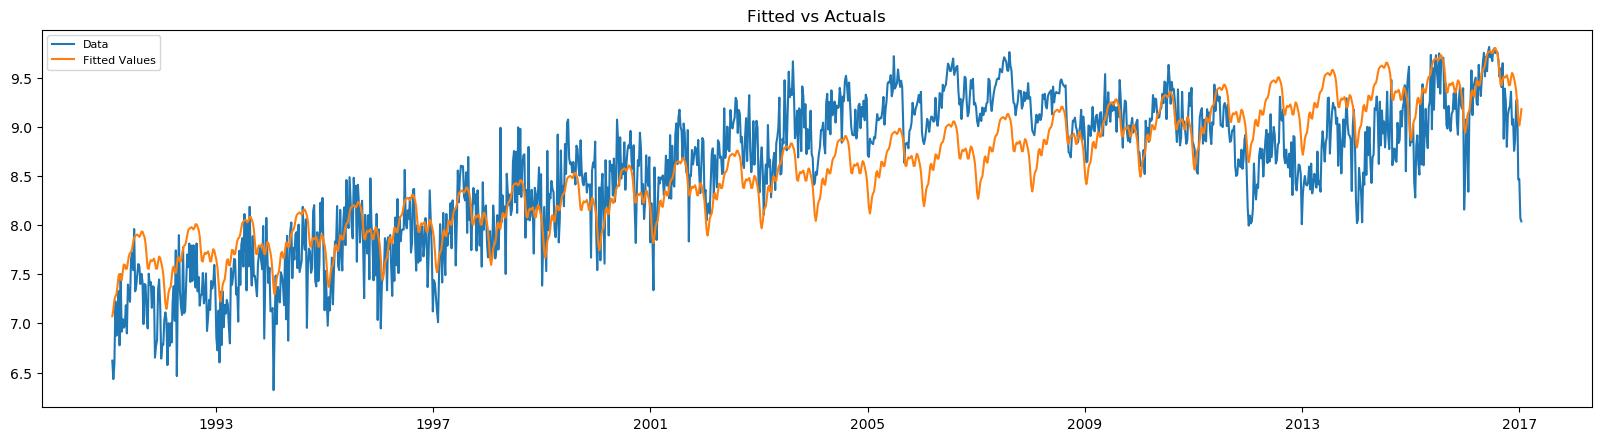

K = 15 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     87.62
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.00e-294
Time:                        22:48:45   Log-Likelihood:                -741.56
No. Observations:                1355   AIC:                             1547.
Df Residuals:                    1323   BIC:                             1714.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5796      0.023    329.239

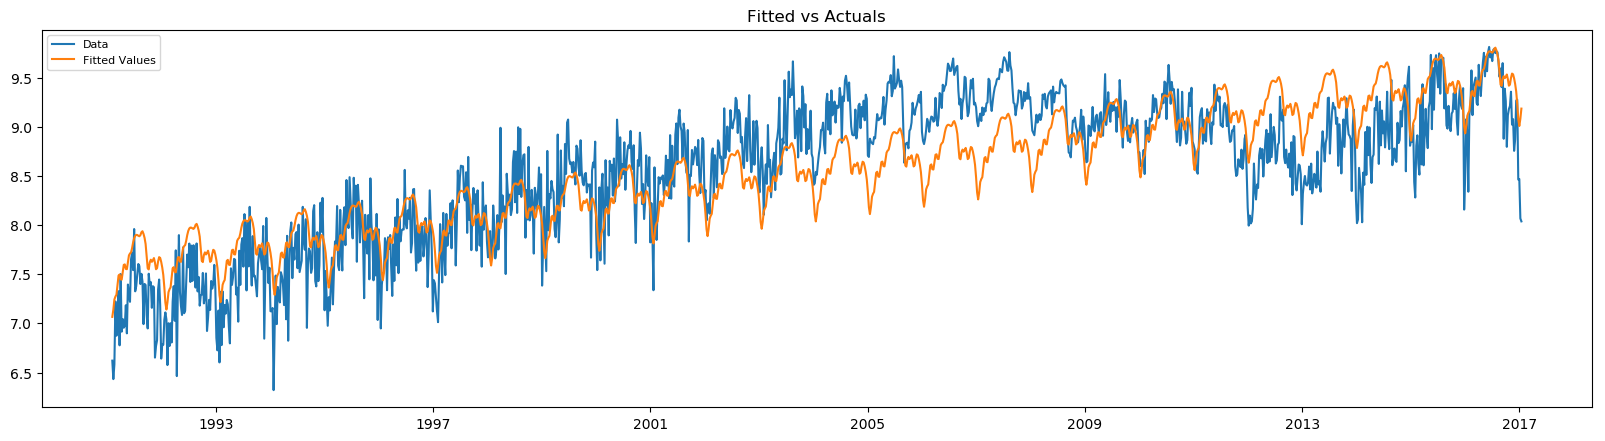

K = 16 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     82.19
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.73e-292
Time:                        22:48:46   Log-Likelihood:                -741.54
No. Observations:                1355   AIC:                             1551.
Df Residuals:                    1321   BIC:                             1728.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5796      0.023    328.993

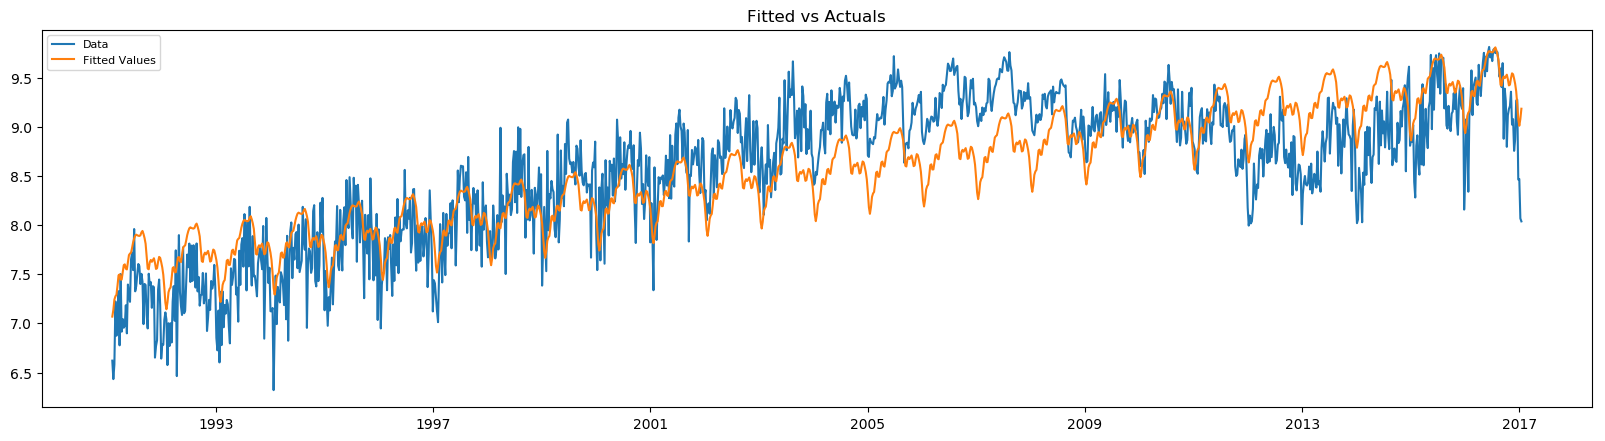

K = 17 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     77.48
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          7.56e-291
Time:                        22:48:46   Log-Likelihood:                -740.89
No. Observations:                1355   AIC:                             1554.
Df Residuals:                    1319   BIC:                             1741.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5796      0.023    328.903

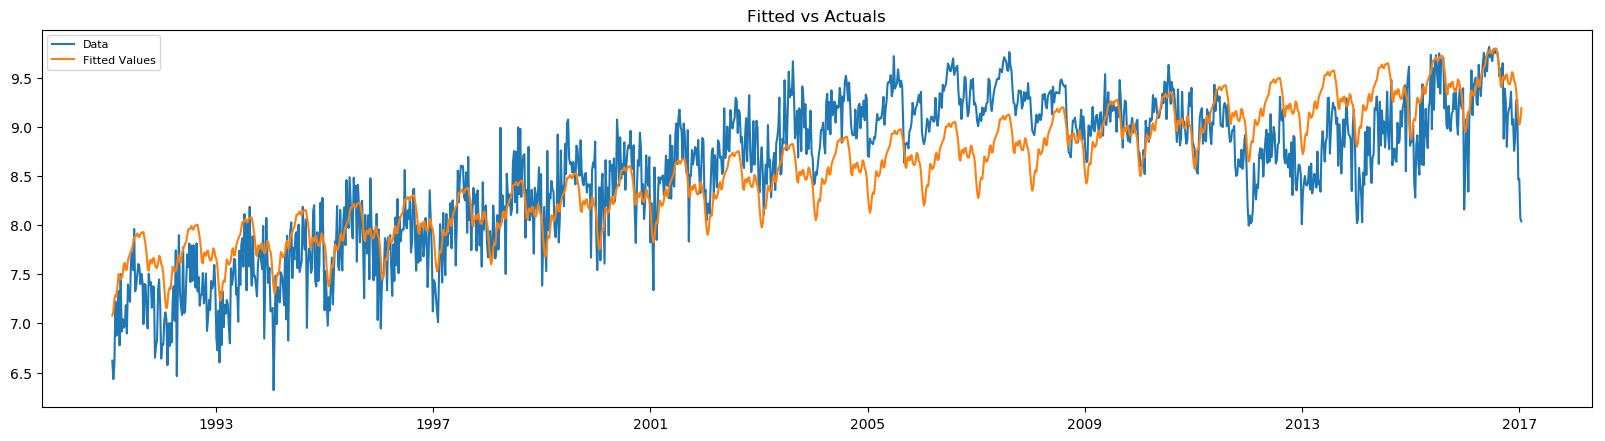

K = 18 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     73.26
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          3.70e-289
Time:                        22:48:47   Log-Likelihood:                -740.41
No. Observations:                1355   AIC:                             1557.
Df Residuals:                    1317   BIC:                             1755.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    328.768

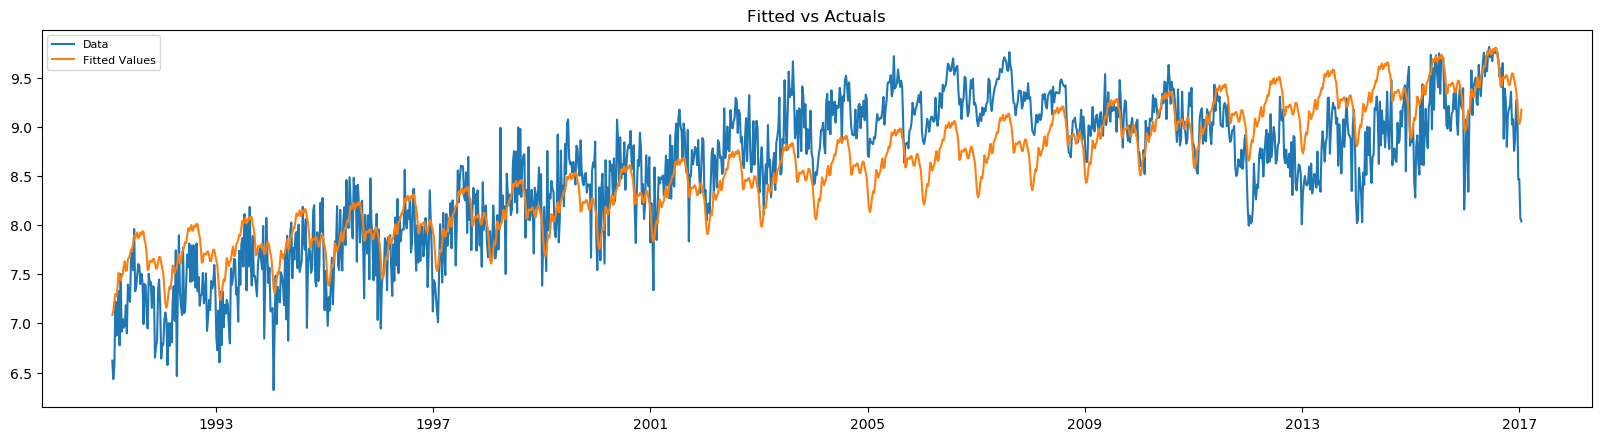

K = 19 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     69.44
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.10e-287
Time:                        22:48:47   Log-Likelihood:                -740.14
No. Observations:                1355   AIC:                             1560.
Df Residuals:                    1315   BIC:                             1769.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    328.581

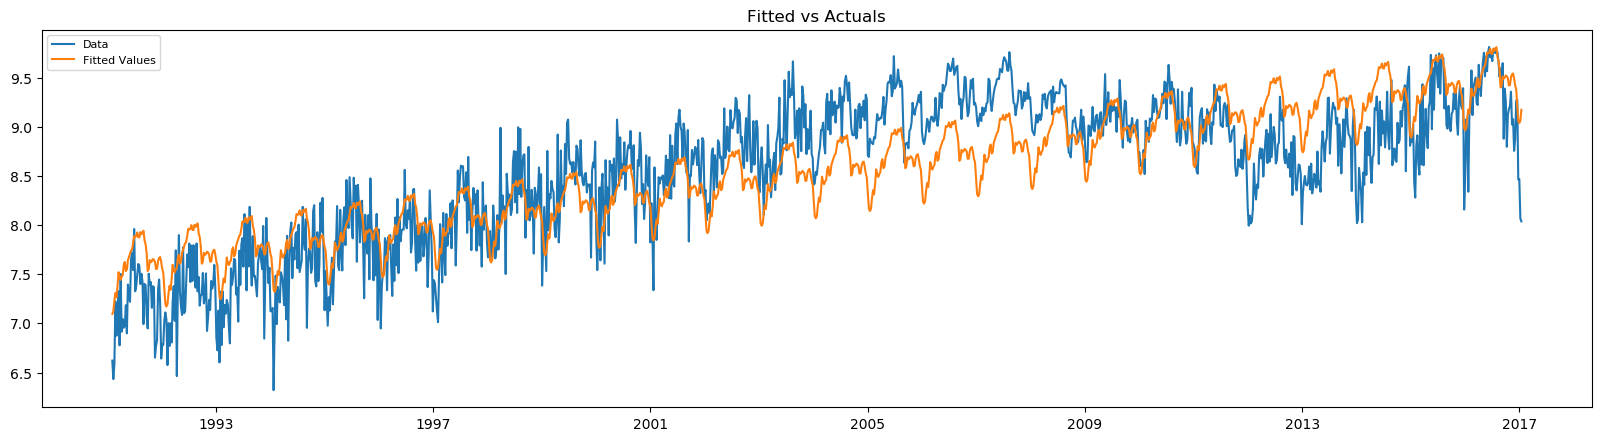

K = 20 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     65.95
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          1.44e-285
Time:                        22:48:48   Log-Likelihood:                -740.12
No. Observations:                1355   AIC:                             1564.
Df Residuals:                    1313   BIC:                             1783.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    328.335

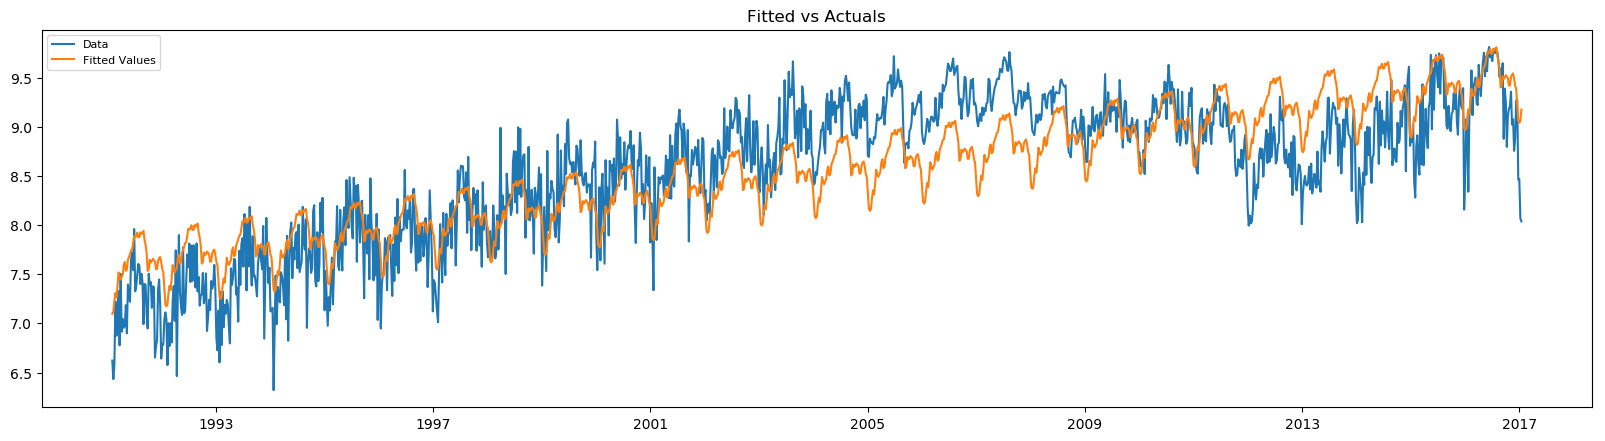

K = 21 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     62.81
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          8.25e-284
Time:                        22:48:48   Log-Likelihood:                -739.98
No. Observations:                1355   AIC:                             1568.
Df Residuals:                    1311   BIC:                             1797.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    328.120

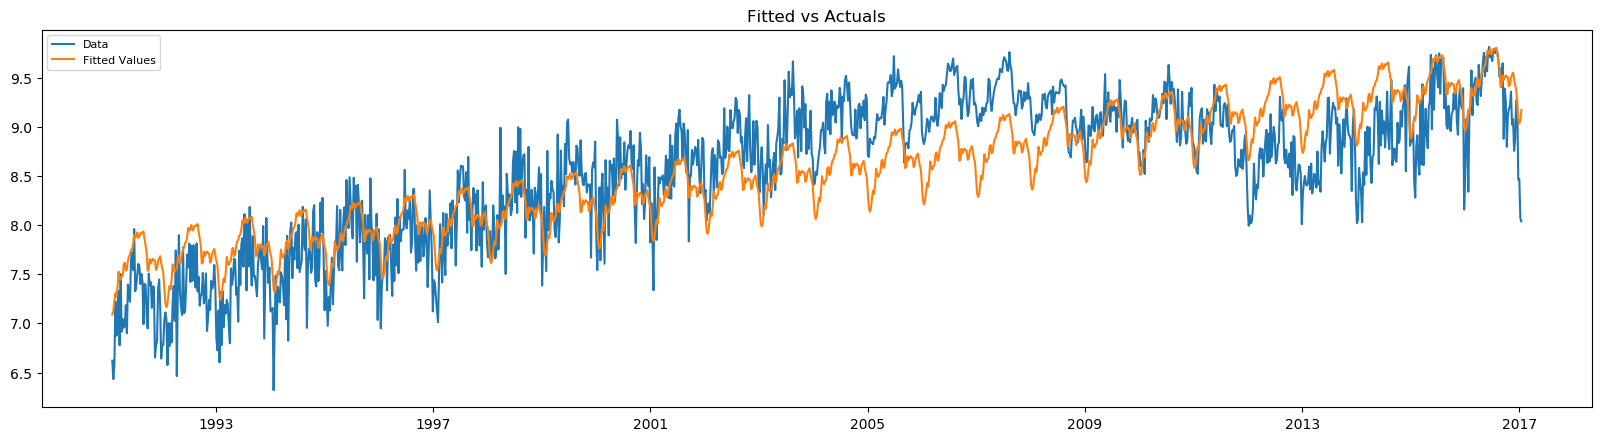

K = 22 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     59.94
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          4.94e-282
Time:                        22:48:49   Log-Likelihood:                -739.92
No. Observations:                1355   AIC:                             1572.
Df Residuals:                    1309   BIC:                             1812.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    327.882

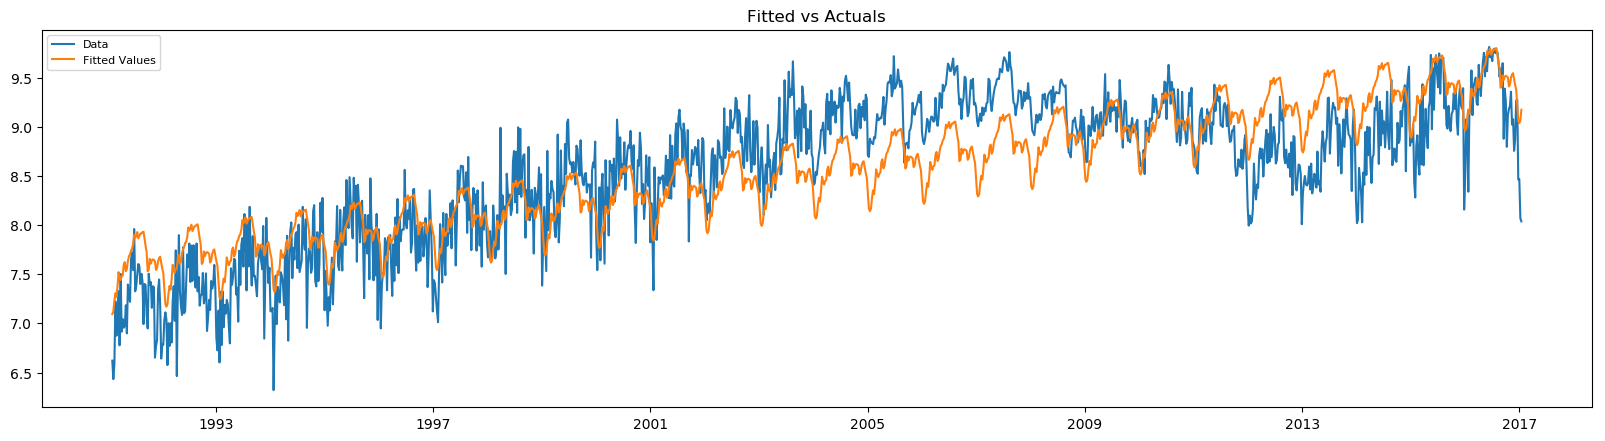

K = 23 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     57.34
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          2.11e-280
Time:                        22:48:50   Log-Likelihood:                -739.57
No. Observations:                1355   AIC:                             1575.
Df Residuals:                    1307   BIC:                             1825.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    327.719

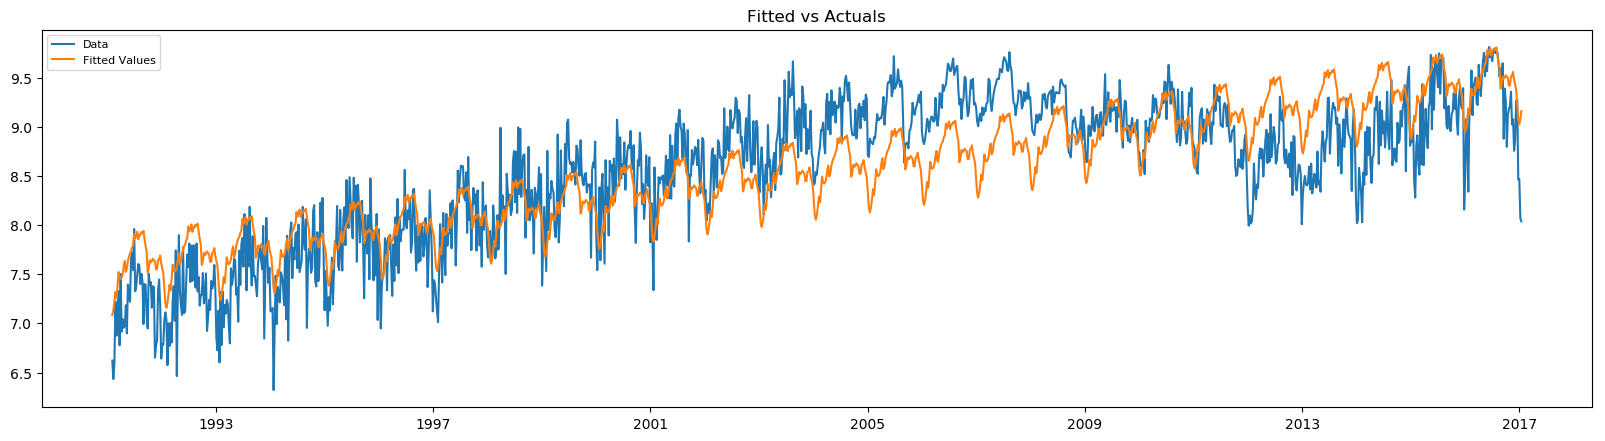

K = 24 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     54.96
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          8.87e-279
Time:                        22:48:50   Log-Likelihood:                -739.24
No. Observations:                1355   AIC:                             1578.
Df Residuals:                    1305   BIC:                             1839.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    327.546

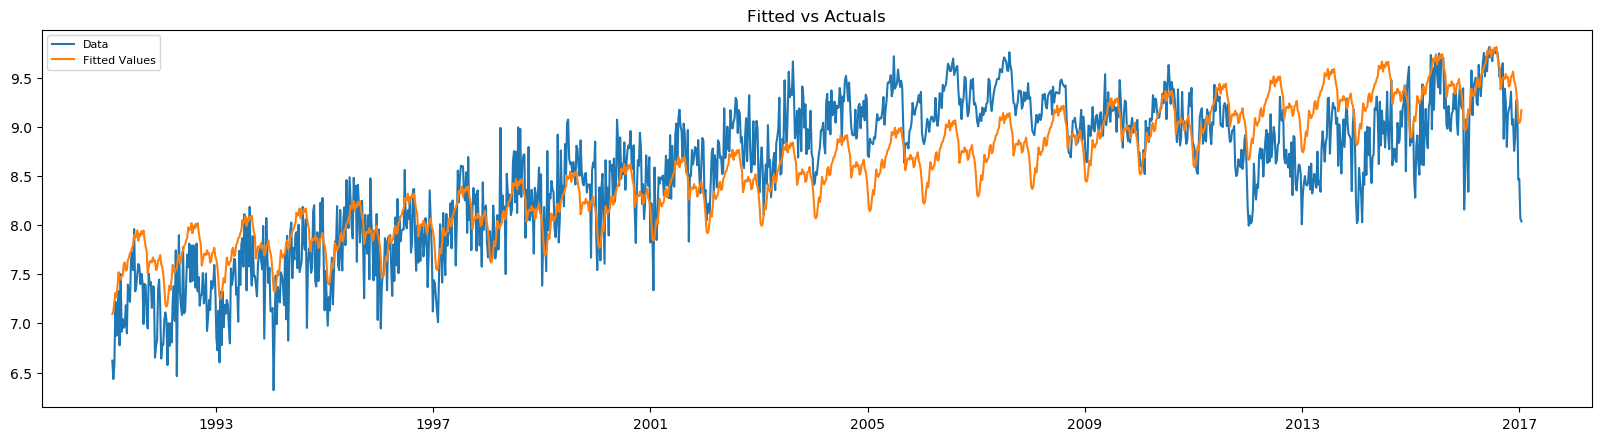

K = 25 

                            OLS Regression Results                            
Dep. Variable:               Gasoline   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     52.73
Date:                Thu, 04 Jun 2020   Prob (F-statistic):          4.46e-277
Time:                        22:48:51   Log-Likelihood:                -739.14
No. Observations:                1355   AIC:                             1582.
Df Residuals:                    1303   BIC:                             1853.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5795      0.023    327.318

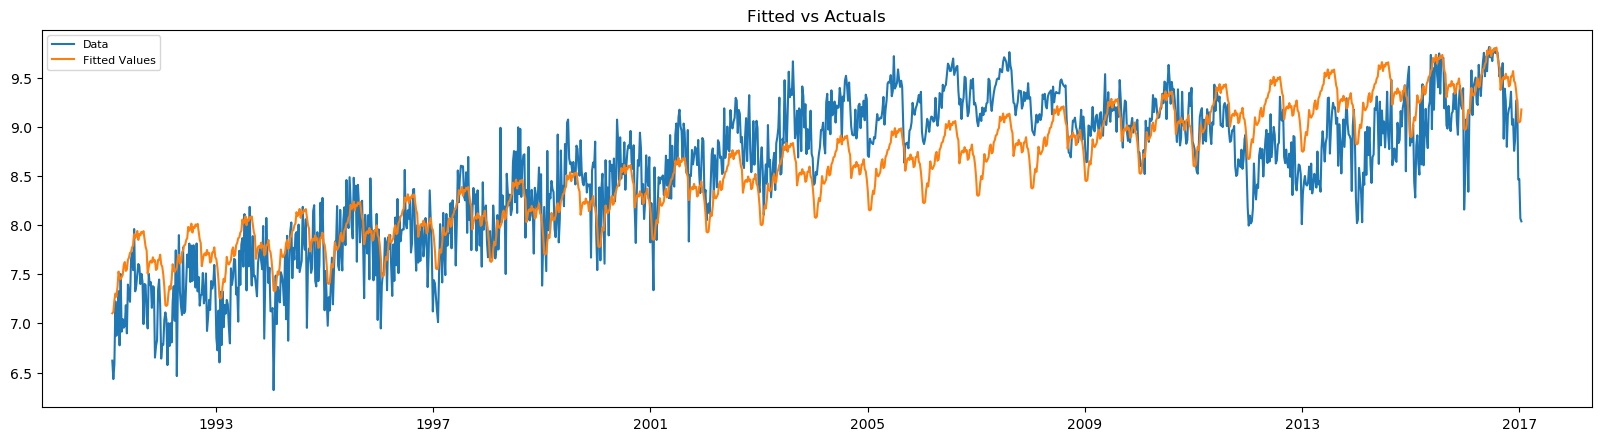

In [94]:
for i in range(1,26):
    print('K = ' +str(i) +' \n')
    res2, model = harmonic_regression(q1_temp, 'Gasoline', 52, i )
    plot_orig_and_fit(q1_temp, 'Gasoline', res2)

K = 6 selected

#### B) Now refit the model using auto_arima() to allow for correlated errors, keeping the same predictor variables as you used in part a.

In [95]:
K = 6
m=52
for i in range(K): q1_temp['Sin'+str(i+1)] = np.sin(2*(i+1)*np.pi*q1_temp['Trend']/m)
for i in range(K): q1_temp['Cos'+str(i+1)] = np.cos(2*(i+1)*np.pi*q1_temp['Trend']/m)
        
Xnew = q1_temp.copy()
target = Xnew['Gasoline']
Xnew.drop('Gasoline', axis =  1, inplace = True)

In [96]:
ARIMA_auto=auto_arima(target,exogenous=np.array(Xnew),trend='c',seasonal=False)
ARIMA_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1355
Model:                     ARMA(2, 2)   Log Likelihood                 -29.537
Method:                       css-mle   S.D. of innovations              0.247
Date:                Thu, 04 Jun 2020   AIC                             97.074
Time:                        22:52:25   BIC                            196.094
Sample:                             0   HQIC                           134.150
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4115      0.363     20.439      0.000       6.701       8.122
x1             0.0014      0.000      3.688      0.000       0.001       0.002
x2            -0.0384      0.012     -3.099      0.002      -0.063      -0.014
x3            -0.0505      0.010     -5.081      0.000      -0.070      -0.031
x4            -0.0534      0.009     -5.679      0.000      -0.072      -0.035
x5            -0.0175      0.009     -1.895      0.058      -0.036       0.001
x6            -0.0311      0.009     -3.407      0.001      -0.049      -0.013
x7            -0.0242      0.009     -2.664      0.008      -0.042      -0.006
x8            -0.2531      0.012    -20.529      0.000      -0.277      -0.229
x9             0.0147      0.010      1.485      0.138      -0.005       0.034
x10           -0.0726      0.009     -7.713      0.000      -0.091      -0.054
x11           -0.0403      0.009     -4.369      0.000      -0.058      -0.022
x12           -0.0048      0.009     -0.523      0.601      -0.023       0.013
x13           -0.0463      0.009     -5.100      0.000      -0.064      -0.029
ar.L1.y       -0.0018      0.002     -0.793      0.428      -0.006       0.003
ar.L2.y        0.9969      0.002    433.091      0.000       0.992       1.001
ma.L1.y        0.1046      0.014      7.472      0.000       0.077       0.132
ma.L2.y       -0.8897      0.014    -63.727      0.000      -0.917      -0.862
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0006           +0.0000j            1.0006            0.5000
AR.2            1.0025           +0.0000j            1.0025            0.0000
MA.1           -1.0030           +0.0000j            1.0030            0.5000
MA.2            1.1206           +0.0000j            1.1206            0.0000
-----------------------------------------------------------------------------
"""

#### C) Check the residuals of the final model using the plot_diagnostics() function. Do they look sufficiently like white noise to continue? If not, try modifying your model, or removing the first few years of data.

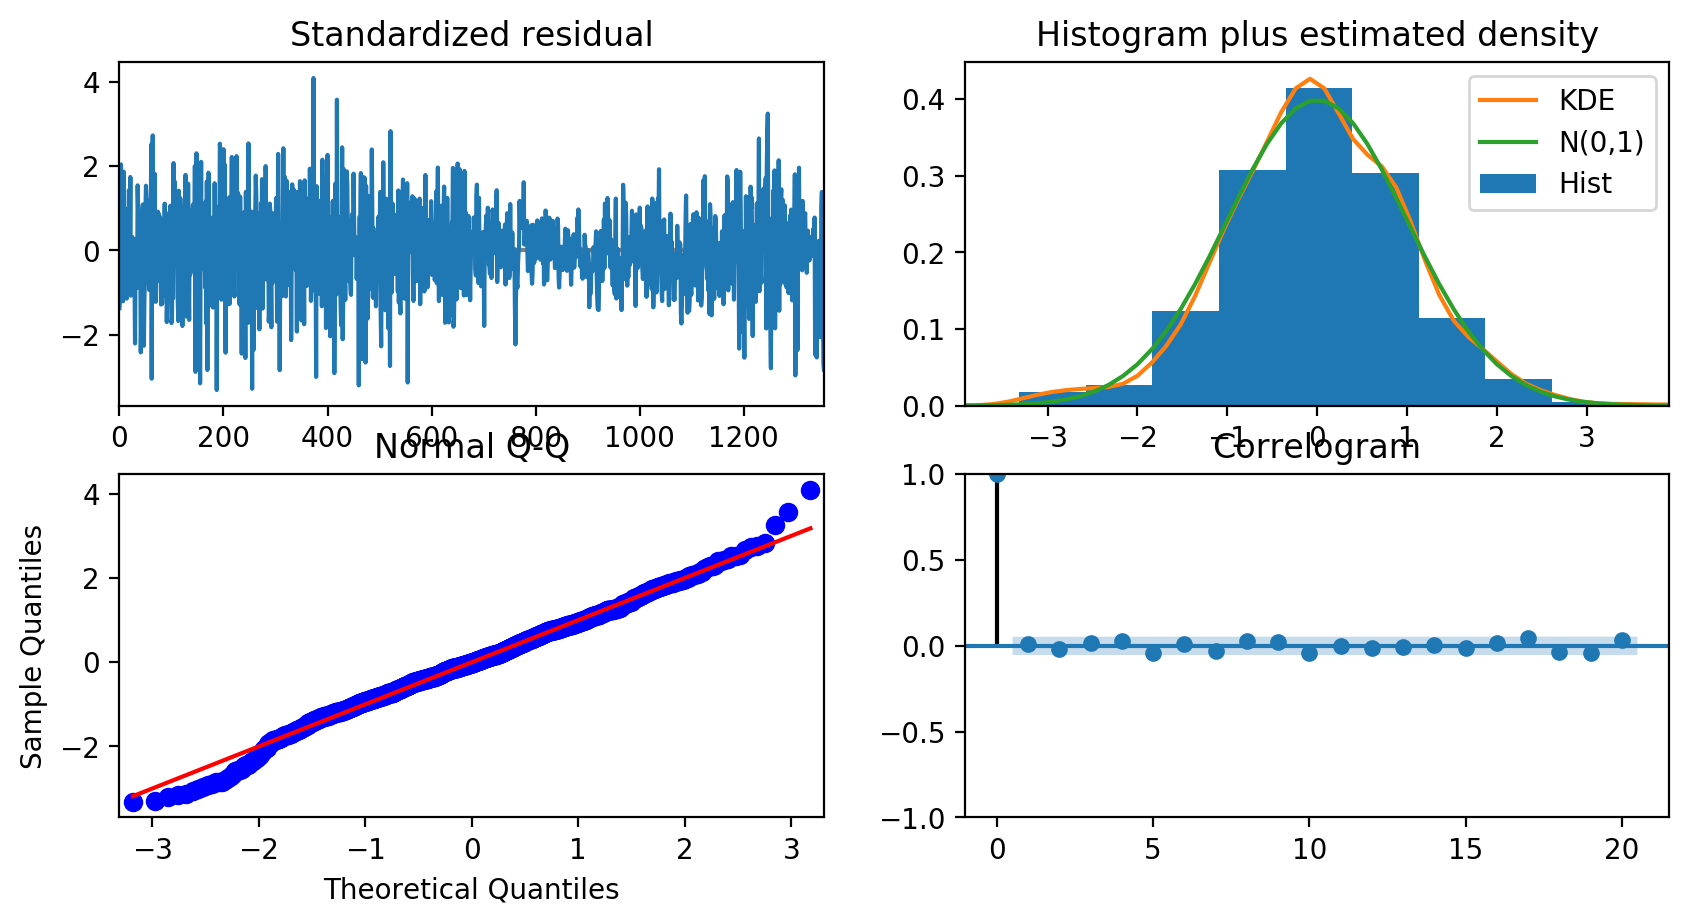

In [99]:
plot = ARIMA_auto.plot_diagnostics(lags=20,fig=plt.figure(figsize=(10,5), dpi=200))

Residuals look like WN.

#### D) Once you have a model with white noise residuals, produce point forecasts for the next year.

Predictions:


array([8.73037337, 8.82988713, 8.87812447, 8.92904493, 8.92784203,
       8.95004333, 8.94797799, 8.98871619, 9.00770931, 9.05688335,
       9.06695532, 9.09722504, 9.09310603, 9.12650132, 9.14566258,
       9.21287811, 9.25924132, 9.33121666, 9.35453194, 9.38404316,
       9.36414652, 9.36889709, 9.35243387, 9.38309644, 9.39627526,
       9.43742988, 9.42707804, 9.41199555, 9.33114894, 9.25873155,
       9.15765012, 9.11080321, 9.07039792, 9.09378148, 9.1049946 ,
       9.14352981, 9.13420705, 9.13446693, 9.09475073, 9.09193308,
       9.07948314, 9.11849547, 9.13571379, 9.16792971, 9.13340338,
       9.08195242, 8.96236558, 8.8593539 , 8.74579295, 8.7084919 ,
       8.69950746])

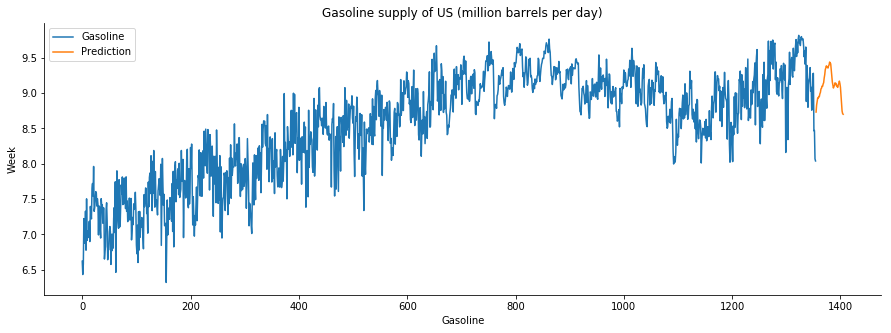

In [98]:
q1_pred = pd.DataFrame()
q1_pred['Trend'] =  np.arange(1356,1407)

K = 6
m=52

for i in range(K): q1_pred['Sin'+str(i+1)] = np.sin(2*(i+1)*np.pi*q1_pred['Trend']/m)
for i in range(K): q1_pred['Cos'+str(i+1)] = np.cos(2*(i+1)*np.pi*q1_pred['Trend']/m)
    
one_year_forecast = ARIMA_auto.predict(51, exogenous = np.array(q1_pred))

print('Predictions:')
display(one_year_forecast)

q1_temp = q1_temp.append(list(one_year_forecast), ignore_index = True)
q1_temp['Prediction'] = q1_temp[0]

basic_timeseries_graph(q1_temp[['Gasoline', 'Prediction']], 'Gasoline supply of US (million barrels per day)', 'Gasoline', 'Week')